
#  A Heated Divide: Who Emits, Who Pays, and Why Climate Justice Cannot Wait

##  Project Summary

This data analysis project explores the global inequality behind climate change using emissions data, energy trends, and climate vulnerability indicators. It answers three key questions:

1. **Who emits the most carbon — historically and today?**  
2. **Who suffers the most from climate impacts?**  
3. **How fair is the global response — and what must change?**

The project uses clear visualizations and real-world case studies (e.g., Pakistan floods) to highlight how high-emitting nations often remain well-protected, while low-emitting nations face extreme climate risks.

---

##  Key Insights

- **The United States** is the world’s top historical emitter; **China** leads in current emissions.
- **Qatar, the U.S., and other wealthy nations** emit far more per person than low-income countries like **Pakistan**.
- Despite low emissions, countries like Pakistan face **deadly floods, heatwaves, and poor air quality**.
- Climate vulnerability is driven not just by geography, but by **economic fragility, weak infrastructure, and lack of adaptive capacity**.
- Some rich countries are improving efficiency (emissions per GDP), but **total global emissions are still rising**.

---

##  Tools & Technologies

- **Python**, **Pandas**, **Seaborn**, **Matplotlib**, **Plotly**
- Jupyter Notebook for interactive exploration
- Data cleaning, time series analysis, categorical comparison

---

##  Datasets Used

- [Our World in Data – CO₂ Emissions](https://ourworldindata.org/co2-emissions)
- NASA GISTEMP – Global Temperature Anomaly Data
- Global weather repository (temperature, humidity, risk indicators)

---

##  Key Steps in Data Analysis

### 1. **Data Import & Cleaning**
- Loaded CSV files from OWID, NASA, and global weather data
- Filtered missing values and standardized column formats

### 2. **Exploratory Data Analysis (EDA)**
- Analyzed global and per-capita CO₂ emissions
- Compared developed vs developing countries
- Examined emissions by fuel type (coal, oil, gas)

### 3. **Visualization**
- Line plots, bar charts, pie charts, and heatmaps using Seaborn, Matplotlib, and Plotly
- Maps showing temperature anomalies and climate risk zones

### 4. **Comparative Insights**
- Side-by-side breakdown of U.S. vs Pakistan
- Per capita vs total emission disparity

### 5. **Projection & Policy Message**
- Long-term warming trends
- Call to action: climate justice and accountability

---

## 📣 Conclusion

This project shows that climate change isn’t just an environmental issue — it’s a justice issue.  
Countries that built wealth on fossil fuels must now take responsibility by:
- Cutting emissions faster
- Funding adaptation in vulnerable nations
- Supporting the global transition to clean energy

---



In [43]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\owid-co2-data.csv")

# Preview structure
print(data.columns)
print(data.head())


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [44]:
# Create GDP per capita column
data['gdp_per_capita'] = data['gdp'] / data['population']

# Filter for the most recent year with data
latest_year = data['year'].max()
recent = data[data['year'] == latest_year]

# Drop rows with missing GDP or population
recent_clean = recent.dropna(subset=['gdp_per_capita'])

# Get top 5 developed countries by GDP per capita
developed = recent_clean.sort_values(by='gdp_per_capita', ascending=False).head(5)['country'].tolist()

# Get bottom 5 underdeveloped countries by GDP per capita
underdeveloped = recent_clean.sort_values(by='gdp_per_capita', ascending=True).head(5)['country'].tolist()

# Add Pakistan if not already included
if "Pakistan" not in underdeveloped:
    underdeveloped.append("Pakistan")

print("Developed:", developed)
print("Underdeveloped:", underdeveloped)


Developed: []
Underdeveloped: ['Pakistan']


In [47]:
# Check year distribution with GDP per capita present
print(data[data['gdp_per_capita'].notnull()]['year'].value_counts().sort_index(ascending=False).head(10))


year
2022    165
2021    165
2020    165
2019    165
2018    165
2017    165
2016    165
2015    165
2014    164
2013    164
Name: count, dtype: int64


In [49]:
latest_year = 2022  # or any year from the count above
recent = data[data['year'] == latest_year].copy()
recent_clean = recent.dropna(subset=['gdp_per_capita'])


In [51]:
# Sort to get top 5 developed countries by GDP per capita
developed = recent_clean.sort_values(by='gdp_per_capita', ascending=False)['country'].tolist()

# Ensure uniqueness and force include U.S. and China
mandatory_developed = ['United States', 'China']
for country in mandatory_developed:
    if country in recent_clean['country'].values and country not in developed:
        developed.insert(0, country)  # Add to front if not already in
developed = list(dict.fromkeys(developed))  # remove duplicates while preserving order
developed = developed[:7]  # limit to 5
if 'United States' and 'China' not in underdeveloped:
    developed.append('United States' and 'China')
# Get bottom 5 underdeveloped countries
underdeveloped = recent_clean.sort_values(by='gdp_per_capita', ascending=True).head(7)['country'].tolist()
if 'Pakistan' not in underdeveloped:
    underdeveloped.append('Pakistan')

print("Developed:", developed)
print("Underdeveloped:", underdeveloped)


Developed: ['Qatar', 'Norway', 'Singapore', 'United Arab Emirates', 'Switzerland', 'Ireland', 'United States', 'China']
Underdeveloped: ['Burundi', 'Central African Republic', 'Liberia', 'Democratic Republic of Congo', 'Mozambique', 'Niger', 'Madagascar', 'Pakistan']


In [53]:



selected_countries = developed + underdeveloped

# Include all years for those countries
comparison_all_years = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2', 'co2_per_capita', 'co2_per_gdp',
    'primary_energy_consumption', 'gdp', 'population']].dropna()



In [55]:
comparison_all_years['Development_Level'] = comparison_all_years['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)


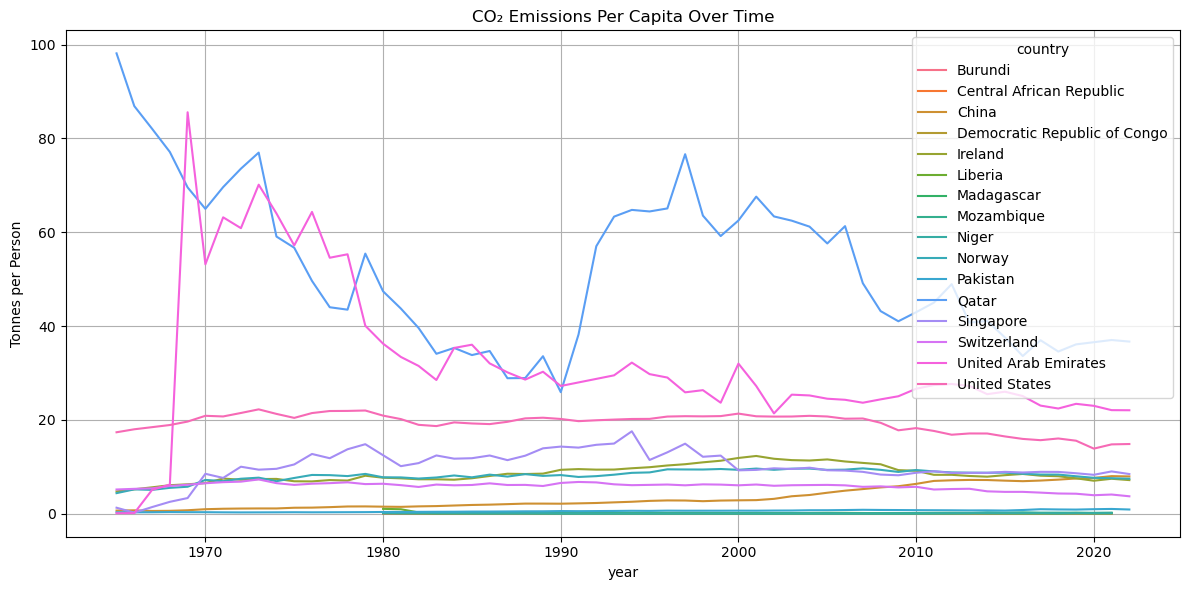

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_all_years, x='year', y='co2_per_capita', hue='country')
plt.title('CO₂ Emissions Per Capita Over Time')
plt.ylabel('Tonnes per Person')
plt.grid(True)
plt.tight_layout()
plt.show()


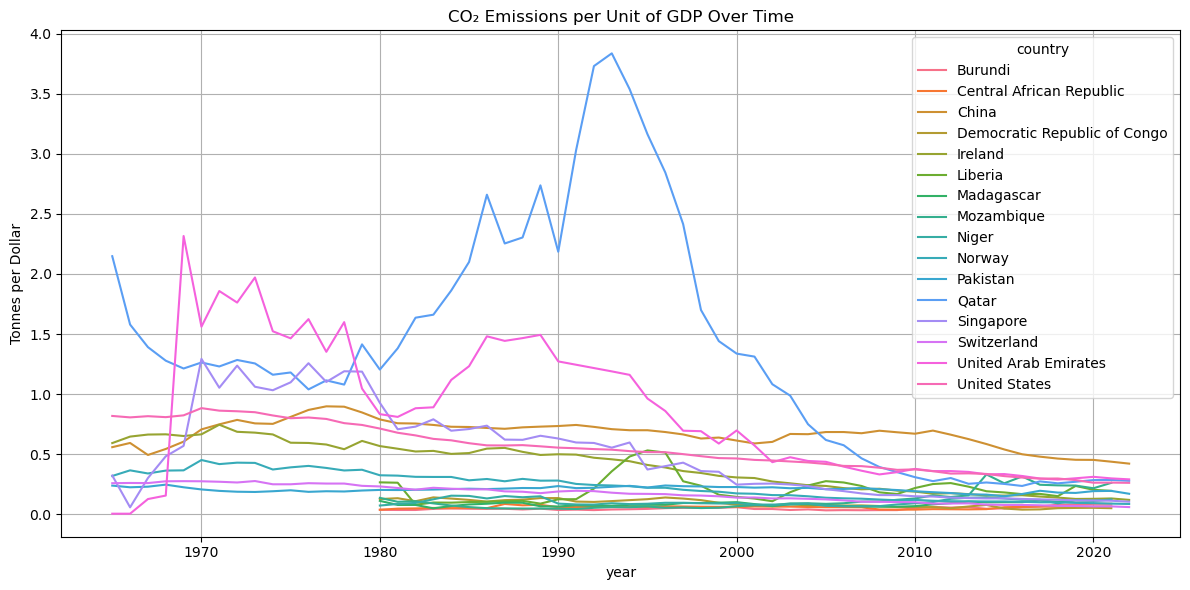

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_all_years, x='year', y='co2_per_gdp', hue='country')
plt.title('CO₂ Emissions per Unit of GDP Over Time')
plt.ylabel('Tonnes per Dollar')
plt.grid(True)
plt.tight_layout()
plt.show()


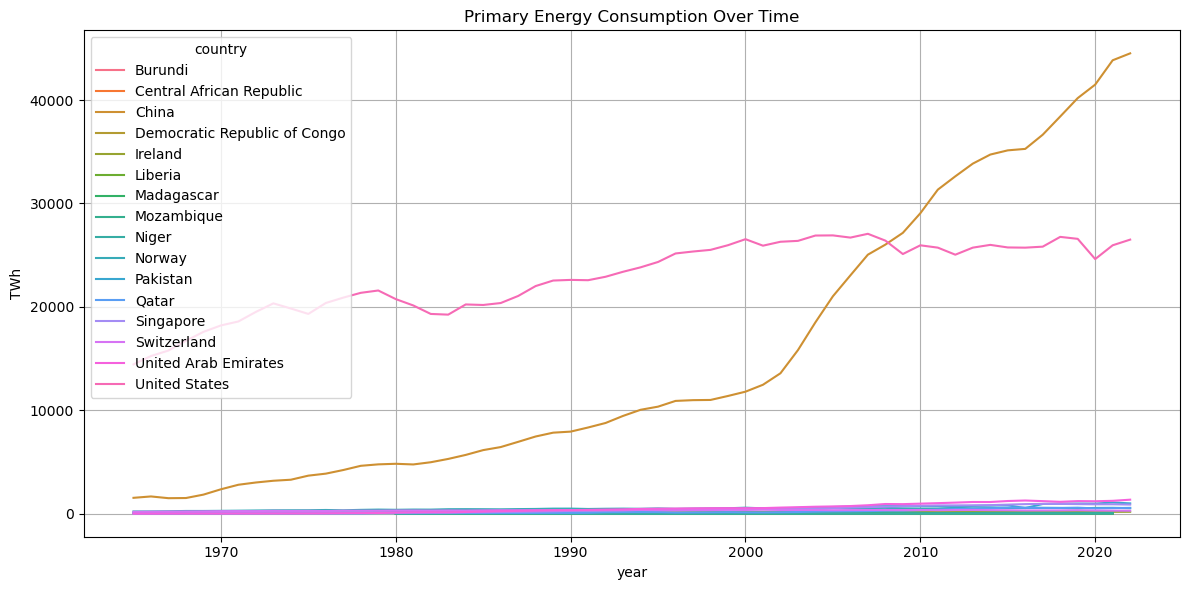

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_all_years, x='year', y='primary_energy_consumption', hue='country')
plt.title('Primary Energy Consumption Over Time')
plt.ylabel('TWh')
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
selected_countries = developed + underdeveloped

# Get all years of data for these countries
all_years = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2_per_capita']].dropna()


In [62]:
# Label countries
all_years['Development_Level'] = all_years['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)


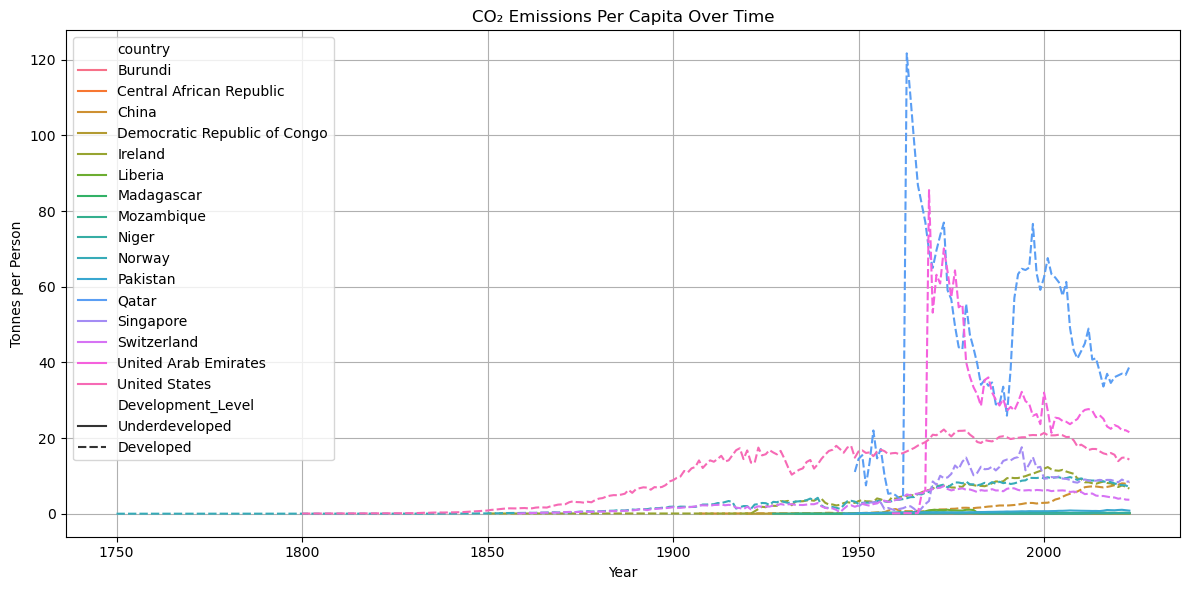

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=all_years, x='year', y='co2_per_capita', hue='country', style='Development_Level')
plt.title('CO₂ Emissions Per Capita Over Time')
plt.ylabel('Tonnes per Person')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:

import plotly.express as px

# Filter all years and compute as before
selected_countries = developed + underdeveloped

# Subset with all years and clean
all_years = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2_per_capita']].dropna()

# Add development level
all_years['Development_Level'] = all_years['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)

# Create interactive line chart
fig = px.line(
    all_years,
    x="year",
    y="co2_per_capita",
    color="country",
    line_dash="Development_Level",
    title="CO₂ Emissions Per Capita Over Time",
    labels={"co2_per_capita": "Tonnes per Person"},
    hover_name="country", height= 900
)

fig.update_traces(mode="lines+markers", )
fig.show()


In [66]:
# Create a combined country list
selected_countries = developed + underdeveloped

# Filter all-year data for those countries and required column
co2_gdp_all_years = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2_per_gdp']].dropna()

# Add development label
co2_gdp_all_years['Development_Level'] = co2_gdp_all_years['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)


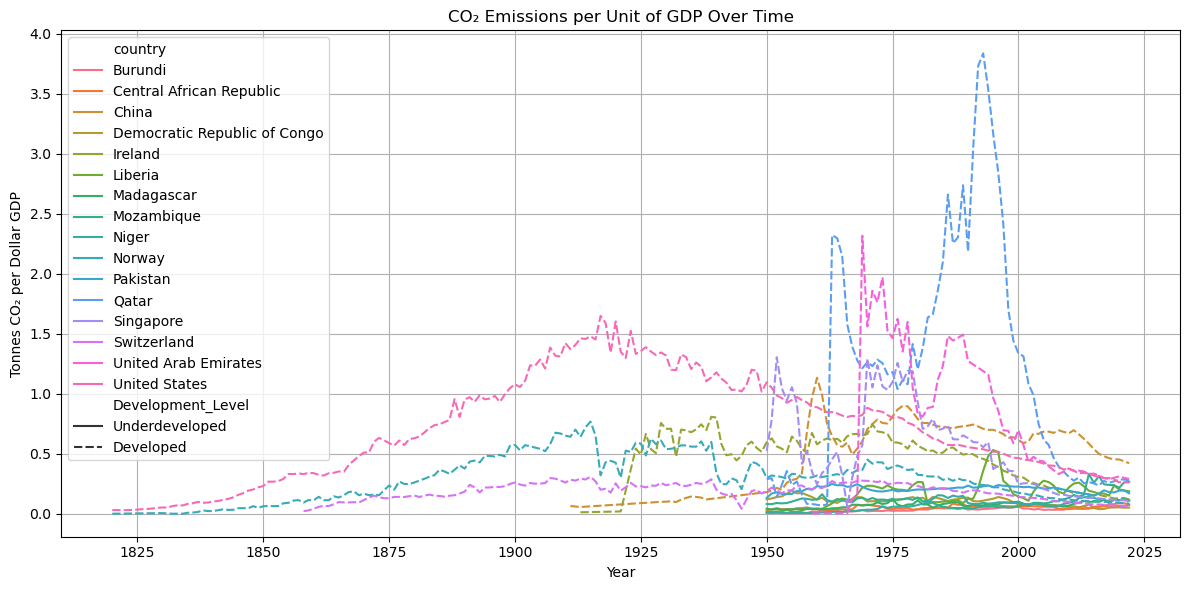

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=co2_gdp_all_years,
    x='year',
    y='co2_per_gdp',
    hue='country',
    style='Development_Level'
)
plt.title("CO₂ Emissions per Unit of GDP Over Time")
plt.ylabel("Tonnes CO₂ per Dollar GDP")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
# Combine all selected countries
selected_countries = developed + underdeveloped

# Filter dataset for all years and drop missing energy data
energy_all_years = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'primary_energy_consumption']].dropna()

# Tag development level
energy_all_years['Development_Level'] = energy_all_years['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)


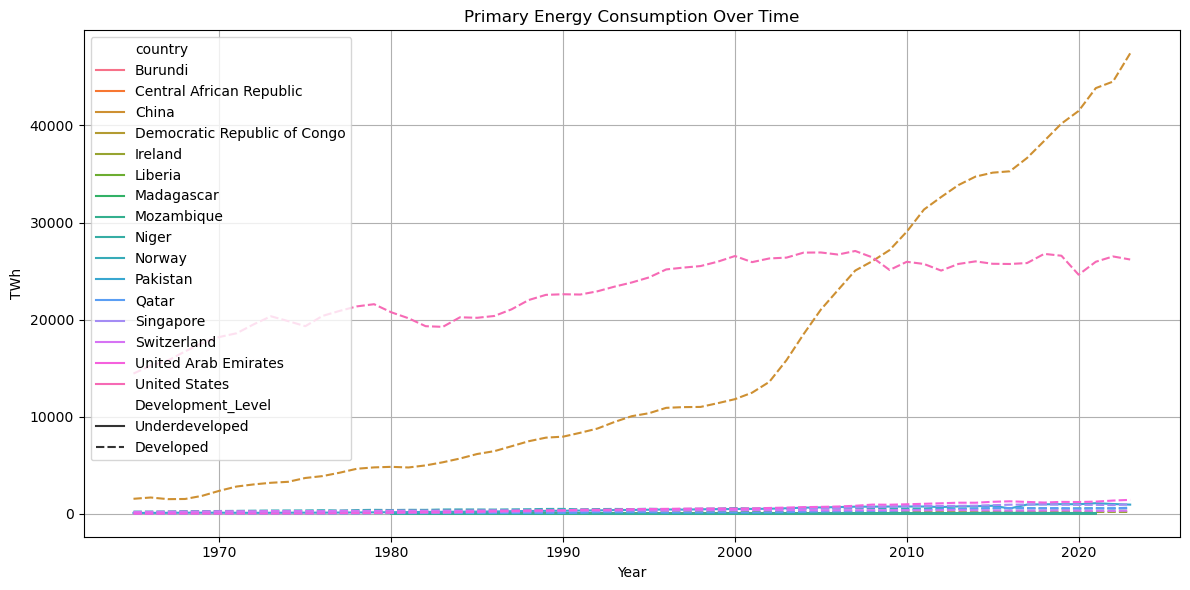

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=energy_all_years,
    x='year',
    y='primary_energy_consumption',
    hue='country',
    style='Development_Level'
)
plt.title("Primary Energy Consumption Over Time")
plt.ylabel("TWh")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
# Filter countries of interest
selected_countries = developed + underdeveloped

# Get all years with both energy and CO₂ data
efficiency_df = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2', 'primary_energy_consumption']].dropna()

# Calculate CO₂ per energy unit (tonnes per TWh)
efficiency_df['co2_per_energy'] = efficiency_df['co2'] / efficiency_df['primary_energy_consumption']

# Add development level
efficiency_df['Development_Level'] = efficiency_df['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)


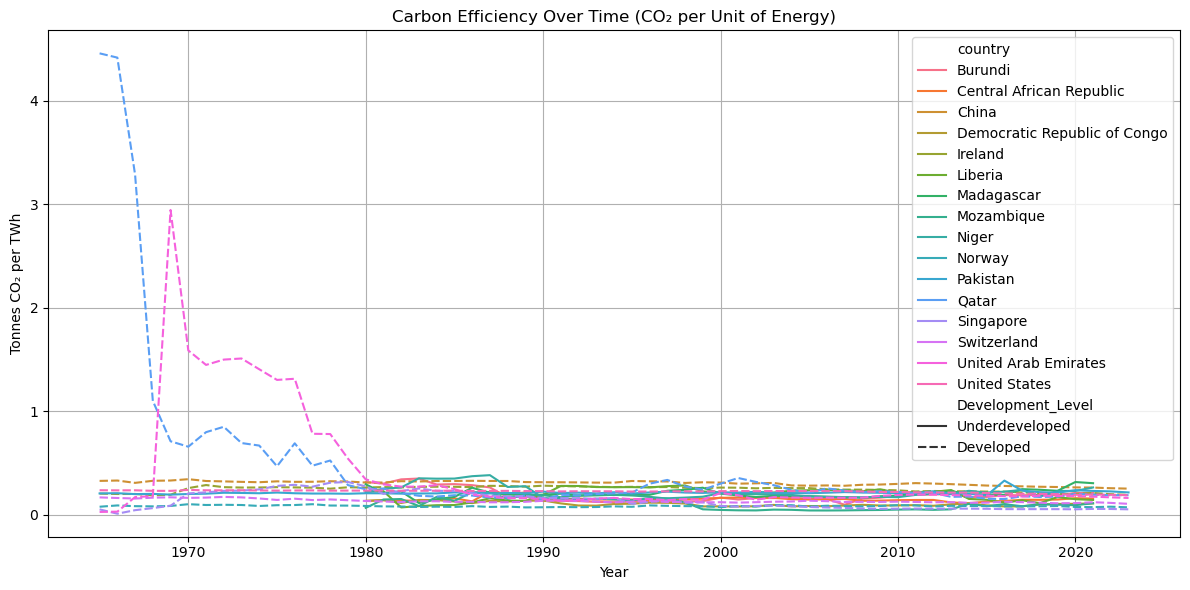

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=efficiency_df,
    x='year',
    y='co2_per_energy',
    hue='country',
    style='Development_Level'
)
plt.title("Carbon Efficiency Over Time (CO₂ per Unit of Energy)")
plt.ylabel("Tonnes CO₂ per TWh")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# Filter data for selected countries and necessary column
cumulative_df = data[data['country'].isin(selected_countries)][['country', 'year', 'co2']].dropna()

# Calculate cumulative emissions per country
cumulative_df['cumulative_co2'] = cumulative_df.groupby('country')['co2'].cumsum()


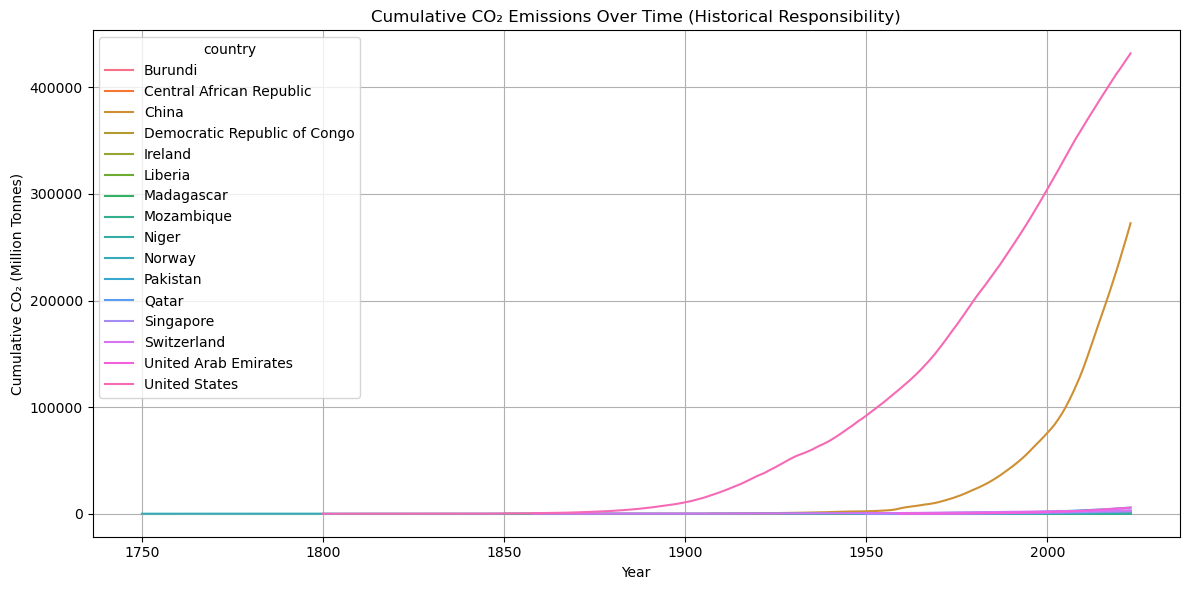

In [86]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_df, x='year', y='cumulative_co2', hue='country')
plt.title("Cumulative CO₂ Emissions Over Time (Historical Responsibility)")
plt.xlabel("Year")
plt.ylabel("Cumulative CO₂ (Million Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Cumulative CO₂ Emissions Over Time (Historical Responsibility)**
 What This Plot Shows:
United States dominates long-term emissions (over 400,000 Mt), rising since the 19th century.
China catches up rapidly since ~2000, reflecting post-industrial economic boom.
All underdeveloped countries (Burundi, Liberia, DRC, etc.) barely register on the graph.

 What It Means:
Historical accountability lies overwhelmingly with developed countries.
These emissions contribute to locked-in climate change (cumulative CO₂ persists in the atmosphere).
Underdeveloped nations, despite facing climate consequences, have not contributed significantly to the problem.

**: Climate justice must consider historical responsibility, not just current emissions.**

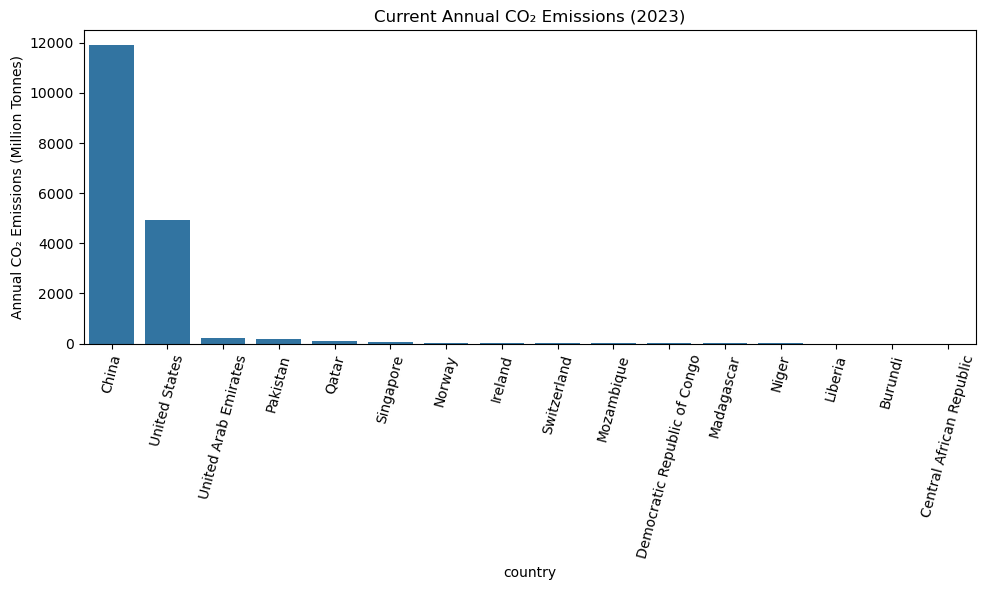

In [89]:
latest_year = data['year'].max()

annual_df = data[
    (data['country'].isin(selected_countries)) &
    (data['year'] == latest_year)
][['country', 'co2']].dropna()

# Sort by highest emitters first
annual_df = annual_df.sort_values(by='co2', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=annual_df, x='country', y='co2')
plt.title(f"Current Annual CO₂ Emissions ({latest_year})")
plt.ylabel("Annual CO₂ Emissions (Million Tonnes)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


**Annual CO₂ Emissions (2023)**

 What Plot Shows:
China leads by far (nearly 12,000 Mt/year), followed by the United States (~4000 Mt).

Countries like Pakistan, UAE, Qatar emit moderate amounts.

Most underdeveloped countries emit <1% of China's total.

 What It Means:
Current policy pressure (e.g., UNFCCC targets) must focus on current heavy emitters.
Even among developing economies like Pakistan, emissions are minor.
Countries like China now face dual scrutiny: historically lower but now the largest emitter.

 **Current emissions help track mitigation responsibility under global treaties.**

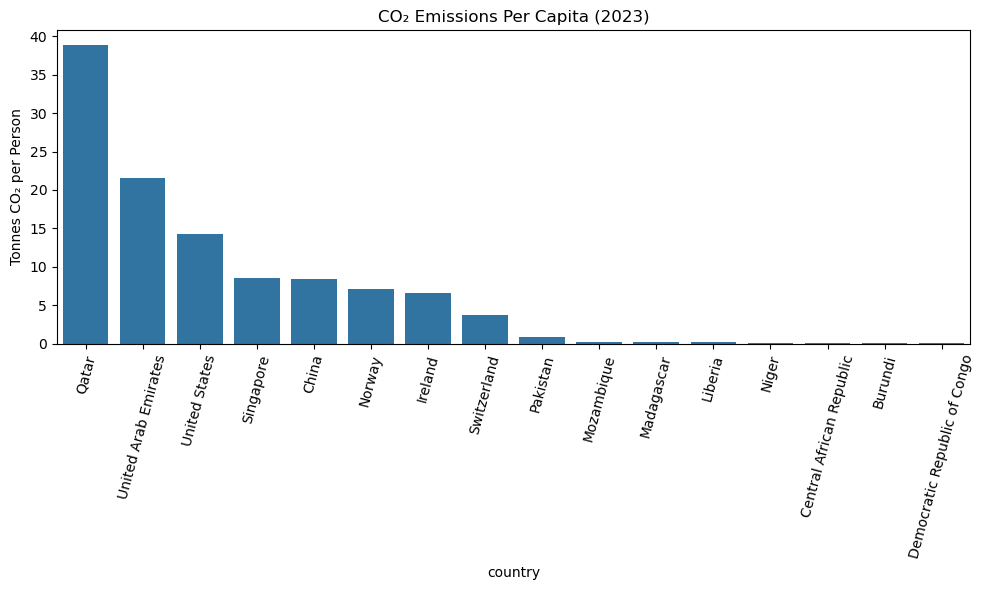

In [92]:
per_capita_df = data[
    (data['country'].isin(selected_countries)) &
    (data['year'] == latest_year)
][['country', 'co2_per_capita']].dropna()

# Sort by CO₂ per capita, descending
per_capita_df = per_capita_df.sort_values(by='co2_per_capita', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=per_capita_df, x='country', y='co2_per_capita')
plt.title(f"CO₂ Emissions Per Capita ({latest_year})")
plt.ylabel("Tonnes CO₂ per Person")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


**CO₂ Emissions Per Capita (2023)**

** What this plot Shows:**
Qatar leads dramatically: ~39 tonnes/person, likely due to fossil fuel exports and low population.

UAE and USA also high (~22 and 14 tonnes/person).

Pakistan, Liberia, Burundi emit <1 tonne/person.

 What It Means:
Per capita emissions reveal inequality: wealthy, low-population nations emit far more per person.
Pakistan appears very carbon-efficient per person.
Developed countries have more individual climate impact, but also greater capacity to reduce.

 **Responsibility should account for fairness per person, not just national totals.**

In [96]:
fuel_data = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'coal_co2', 'oil_co2', 'gas_co2']].dropna()


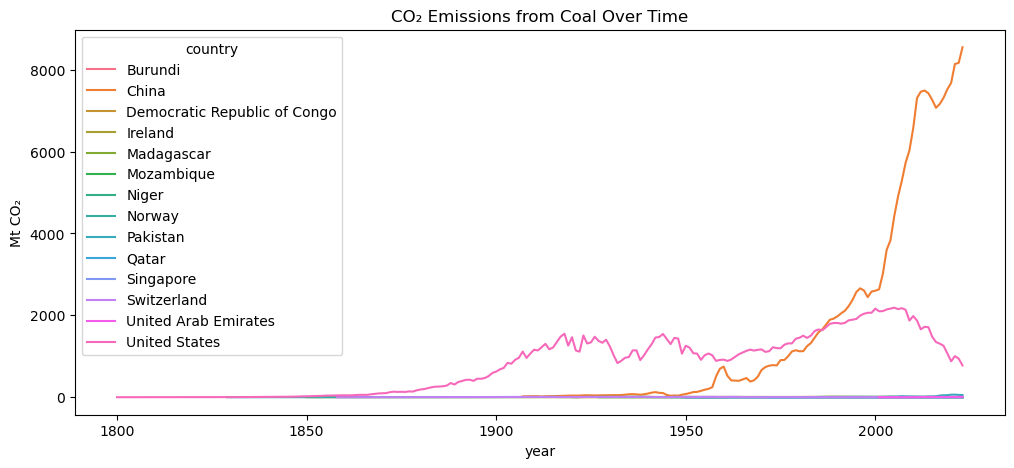

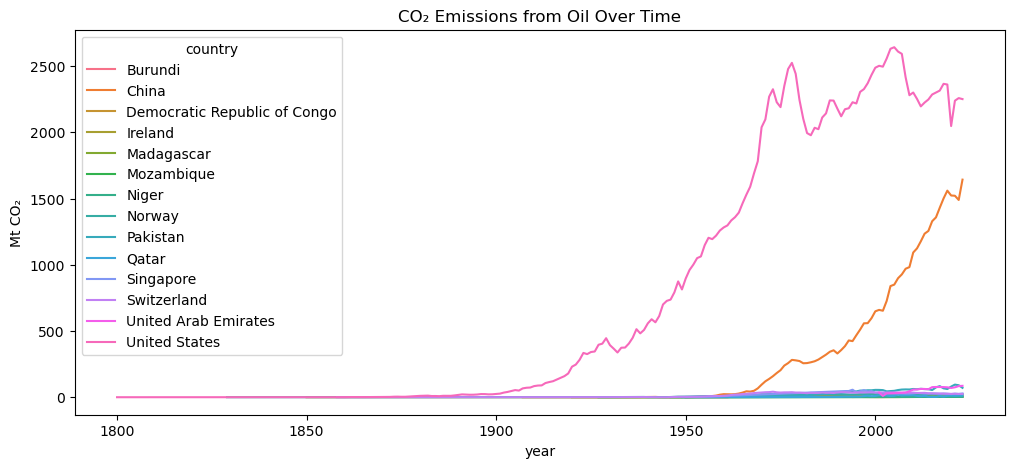

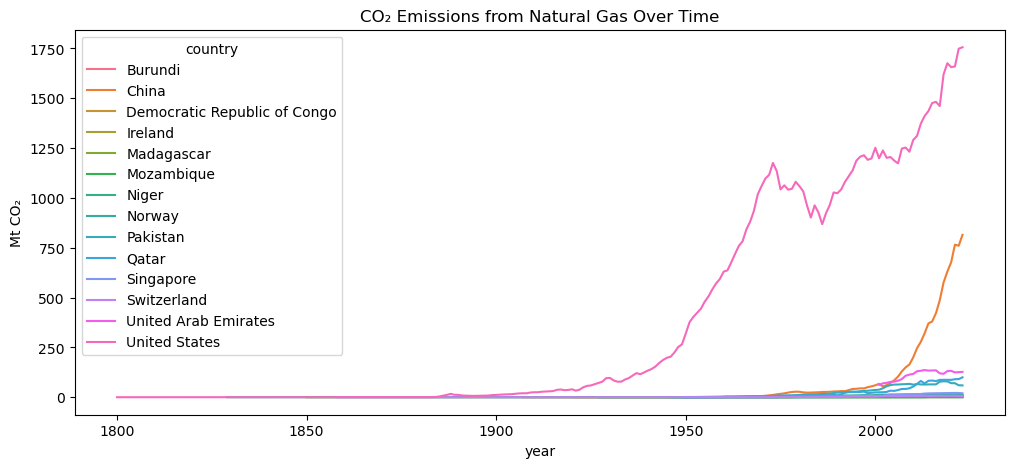

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot coal CO₂
plt.figure(figsize=(12, 5))
sns.lineplot(data=fuel_data, x='year', y='coal_co2', hue='country')
plt.title("CO₂ Emissions from Coal Over Time")
plt.ylabel("Mt CO₂")
plt.show()

# Repeat for oil
plt.figure(figsize=(12, 5))
sns.lineplot(data=fuel_data, x='year', y='oil_co2', hue='country')
plt.title("CO₂ Emissions from Oil Over Time")
plt.ylabel("Mt CO₂")
plt.show()

# Repeat for gas
plt.figure(figsize=(12, 5))
sns.lineplot(data=fuel_data, x='year', y='gas_co2', hue='country')
plt.title("CO₂ Emissions from Natural Gas Over Time")
plt.ylabel("Mt CO₂")
plt.show()


**CO₂ Emissions from Coal Over Time**

 Key Observations:
China dominates since the early 2000s, now emitting over 8,000 Mt CO₂/year from coal alone.
United States had a long rise starting from the late 1800s, peaking around 2005, then declining (shift to gas/renewables).
All underdeveloped countries (e.g., Burundi, Niger, Mozambique) are essentially flatlined near zero.

Developed countries like Switzerland, Norway, Singapore show negligible coal use today.

 Interpretation:
Coal is the dirtiest fossil fuel and the biggest driver of climate change.
China’s recent coal surge reflects its industrial growth; the U.S. trend shows policy and market-driven decarbonization.
Underdeveloped countries’ absence reflects energy poverty, not efficiency.

Narrative Insight: The responsibility lies with a few large economies. Countries like China and the U.S. must lead the phaseout of coal.

**CO₂ Emissions from Oil Over Time**
    
 Key Observations:
United States is clearly the dominant oil emitter, especially from the 1950s to the 2000s.
China’s oil emissions sharply increased after 1990.

Countries like Pakistan, Qatar, UAE have modest but increasing trends.

Underdeveloped countries again contribute very little.

 Interpretation:
Oil emissions are often linked to transport and mobility sectors.

The U.S. oil trend reflects car-centric infrastructure and industrial expansion post-WWII.
China’s rise reflects vehicle ownership boom and economic expansion.
Narrative Insight: The U.S. has historically emitted the most from oil. China’s surge in recent decades shows the need for transport reform globally.

**CO₂ Emissions from Natural Gas Over Time**
    
 Key Observations:
United States is again leading, with emissions growing steadily since the 1950s.

China’s natural gas emissions have risen sharply since ~2005.

Countries like UAE, Qatar, Singapore also show smaller but noticeable increases — reflecting gas-based energy.

Underdeveloped nations remain very low or absent.

 Interpretation:
Natural gas is often viewed as a “transition fuel” — cleaner than coal but still a fossil fuel.

U.S. expansion reflects the fracking boom and shift away from coal.

China's increase suggests diversification of its energy mix, but still fossil-heavy.

Narrative Insight: Even "cleaner" fuels like gas are rising. Transitioning to renewables is essential to bend the emissions curve.

| Fuel     | Key Emitters | Trend                                   | Interpretation                     |
| -------- | ------------ | --------------------------------------- | ---------------------------------- |
| **Coal** | China, US    | Sharp rise (China), decline (US)        | Industrial base, power sector      |
| **Oil**  | US, China    | Historic peak (US), recent rise (China) | Transport-dominated                |
| **Gas**  | US, China    | Steady climb                            | "Cleaner" alternative, still risky |


In [104]:
print(data.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [106]:
sector_data = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'cement_co2', 'flaring_co2', 'other_industry_co2']].dropna()


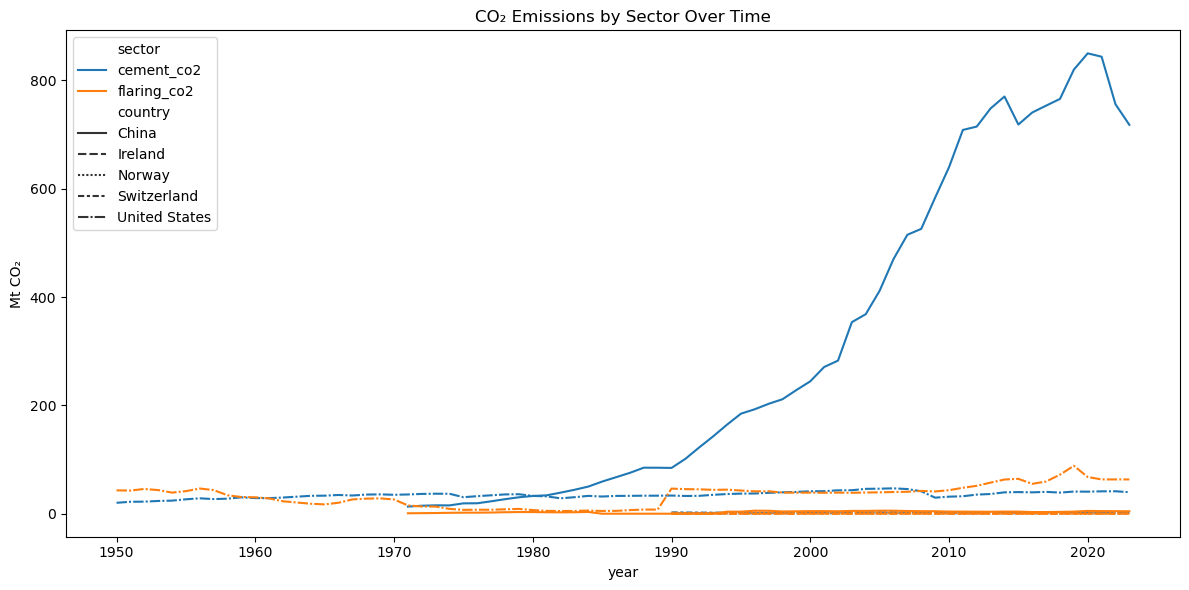

In [108]:
sector_melted = sector_data.melt(
    id_vars=['country', 'year'],
    value_vars=['cement_co2', 'flaring_co2'],
    var_name='sector',
    value_name='emissions'
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_melted, x='year', y='emissions', hue='sector', style='country')
plt.title("CO₂ Emissions by Sector Over Time")
plt.ylabel("Mt CO₂")
plt.tight_layout()
plt.show()


**Sector-Based CO₂ Emissions (Cement & Flaring) by Country**

 Interpretation:
China shows a massive rise in cement-related CO₂ since ~2000, peaking ~2020. This aligns with its construction boom.

Flaring emissions are relatively stable and low for all countries.

Other countries (US, Ireland, Norway, Switzerland) show minimal cement-related emissions.

 Insight:
Cement is a key industrial source of CO₂, especially in developing economies expanding infrastructure.

China alone dominates cement emissions, underscoring its role in global industrial CO₂.

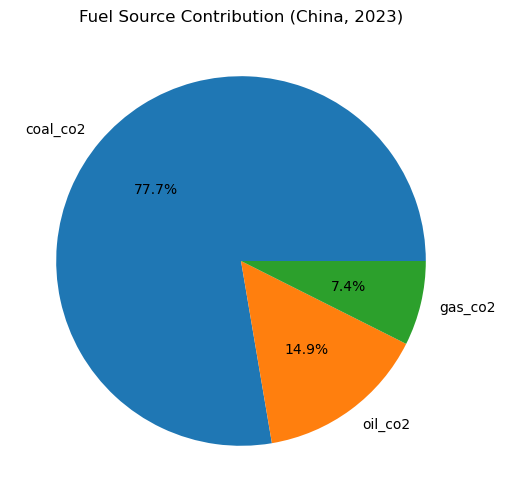

In [111]:
latest_year = data['year'].max()

fuel_summary = data[
    (data['country'] == 'China') & (data['year'] == latest_year)
][['coal_co2', 'oil_co2', 'gas_co2']].iloc[0]

fuel_summary.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Fuel Source Contribution (China, 2023)')
plt.ylabel("")
plt.show()


**Fuel Source Contribution (China, 2023)**

 Interpretation:
Coal: 77.7% of China’s emissions → heavy dependence.

Oil: 14.9%, Gas: 7.4%

 Insight:
China remains overwhelmingly dependent on coal, the dirtiest fossil fuel.

This explains China’s high total emissions and relatively low energy efficiency.

Clean energy transition in China = global climate tipping point.

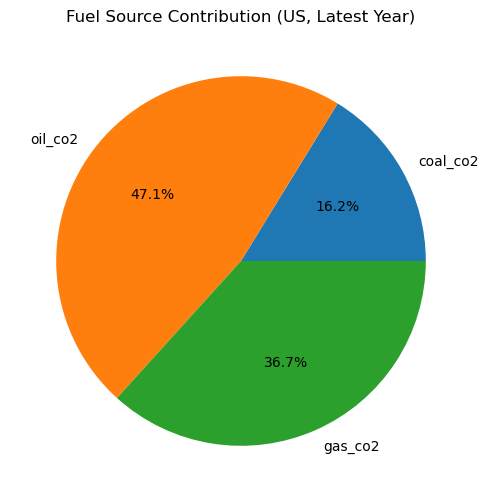

In [114]:
latest_year = data['year'].max()
fuel_summary = data[
    (data['country'] == 'United States') & (data['year'] == latest_year)
][['coal_co2', 'oil_co2', 'gas_co2']].iloc[0]

fuel_summary.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Fuel Source Contribution (US, Latest Year)')
plt.ylabel("")
plt.show()


**Fuel Source Contribution (United States, Latest Year)**

 Interpretation:
Oil: 47.1%  dominant, linked to transport.

Gas: 36.7%  shows cleaner shift.

Coal: 16.2%  relatively low.

 Insight:
The U.S. is transitioning from coal to natural gas and oil, especially post-2000s.

Gas is cleaner than coal, but still carbon-emitting.

US fuel mix shows improvement, but oil remains a transport dependency challenge.


In [117]:
# Get most recent year
latest_year = data['year'].max()

# Get top 5 countries by total CO₂ emissions in that year
top_emitters_df = data[data['year'] == latest_year][['country', 'co2']].dropna()
top_emitters = top_emitters_df.sort_values(by='co2', ascending=False).head(5)['country'].tolist()
print("Top Emitters:", top_emitters)


Top Emitters: ['World', 'Non-OECD (GCP)', 'Asia', 'Asia (GCP)', 'Upper-middle-income countries']


In [119]:
fuel_data = data[
    data['country'].isin(top_emitters)
][['country', 'year', 'coal_co2', 'oil_co2', 'gas_co2']].dropna()


In [121]:
fuel_melted = fuel_data.melt(
    id_vars=['country', 'year'],
    value_vars=['coal_co2', 'oil_co2', 'gas_co2'],
    var_name='fuel_type',
    value_name='emissions'
)


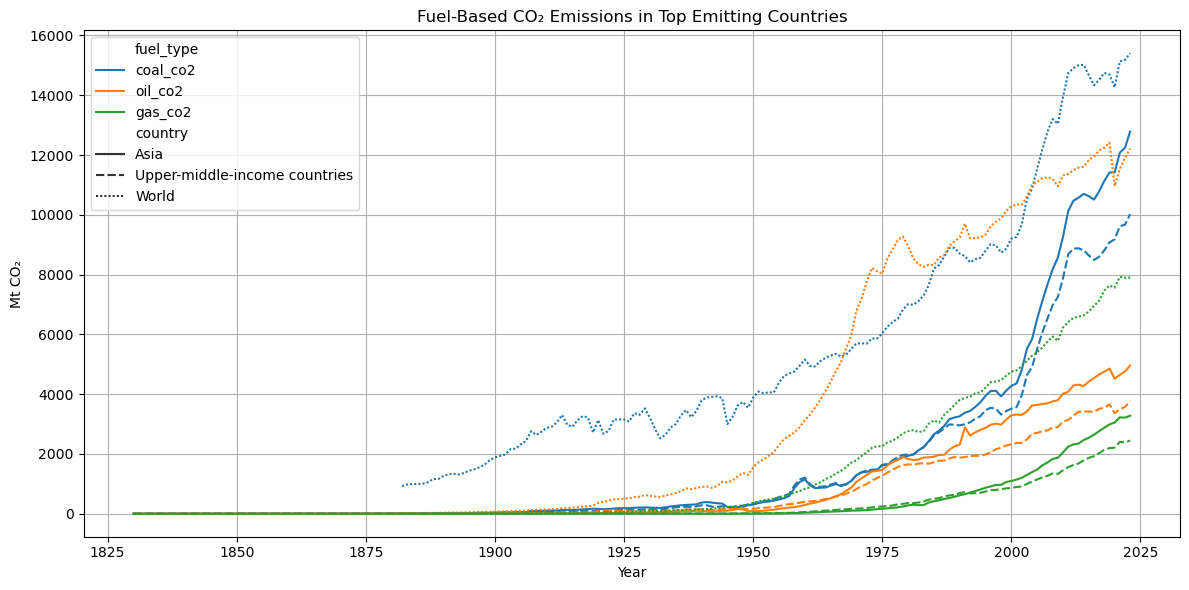

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=fuel_melted, x='year', y='emissions', hue='fuel_type', style='country')
plt.title("Fuel-Based CO₂ Emissions in Top Emitting Countries")
plt.ylabel("Mt CO₂")
plt.xlabel("Year")
plt.tight_layout()
plt.grid(True)
plt.show()


**Fuel-Based CO₂ Emissions: Top Emitting Countries & Global Context**

 Interpretation:
Global coal emissions surged after 2000, mostly due to Asia and upper-middle-income countries.

Oil emissions dominated globally during 1960–2000.

Gas emissions are rising fast post-2000.

 Insight:
The post-2000 coal surge is mostly Asia-driven (especially China).

Developed regions are gradually replacing coal with gas.

The world hasn’t plateaued , emissions continue to rise.

Fossil dependency is deep, and renewables are still not displacing enough.

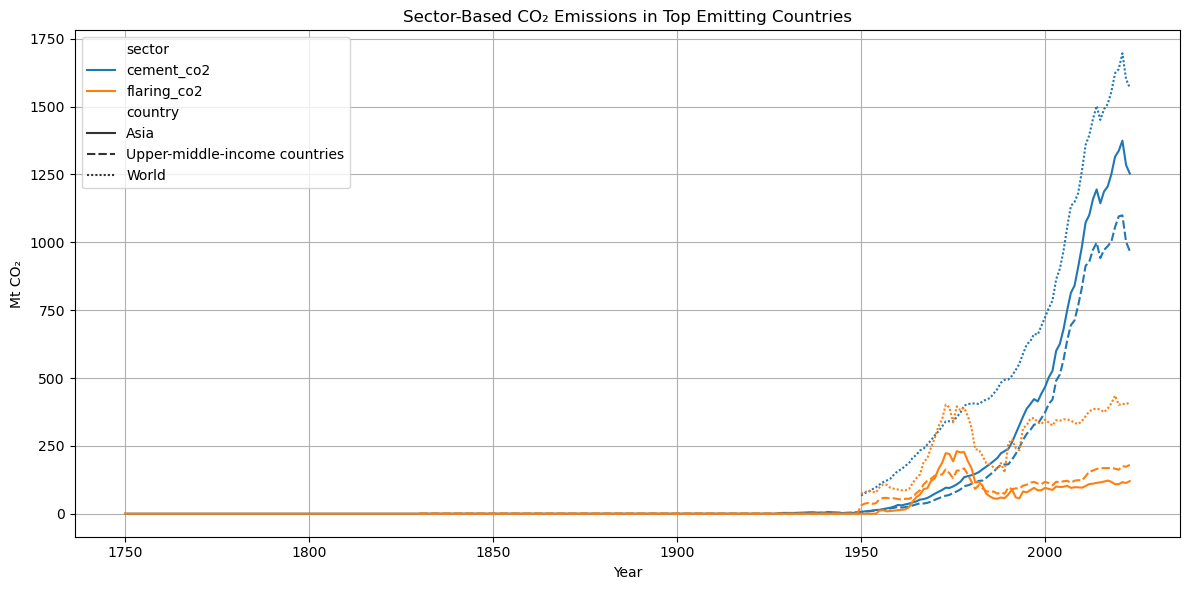

In [126]:
# Only use available sector columns: cement & flaring
sector_data = data[
    data['country'].isin(top_emitters)
][['country', 'year', 'cement_co2', 'flaring_co2']].dropna()

sector_melted = sector_data.melt(
    id_vars=['country', 'year'],
    value_vars=['cement_co2', 'flaring_co2'],
    var_name='sector',
    value_name='emissions'
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_melted, x='year', y='emissions', hue='sector', style='country')
plt.title("Sector-Based CO₂ Emissions in Top Emitting Countries")
plt.ylabel("Mt CO₂")
plt.xlabel("Year")
plt.tight_layout()
plt.grid(True)
plt.show()


**Sector-Based CO₂ Emissions (Cement & Flaring) in Top Emitters**
 
 Interpretation:
Cement CO₂ emissions have grown sharply, especially in Asia and middle-income nations, post-2000.

Flaring CO₂ is lower but consistent globally.

 Insight:
The industrial sector, especially cement, is a hidden but powerful CO₂ driver.

Reducing these emissions will require industrial innovation (e.g. green cement, carbon capture).

| Chart                         | Key Takeaway                                        |
| ----------------------------- | --------------------------------------------------- |
| Sector emissions (by country) | China leads cement CO₂ massively; others minor      |
| China fuel mix (2023)         | 77% coal = climate hotspot                          |
| US fuel mix (latest)          | Less coal, more oil/gas = moderate progress         |
| Global fuel trends            | Post-2000 coal boom driven by Asia                  |
| Global sector trends          | Cement emissions rapidly rising in developing world |


In [130]:
# Define your selected countries
selected_countries = developed + underdeveloped

# Filter required columns and drop missing values
efficiency_data = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2_per_capita', 'co2_per_gdp', 'co2', 'primary_energy_consumption']].dropna()

# Calculate CO₂ per unit of energy
efficiency_data['co2_per_energy'] = efficiency_data['co2'] / efficiency_data['primary_energy_consumption']

# Add development group
efficiency_data['Development_Level'] = efficiency_data['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)


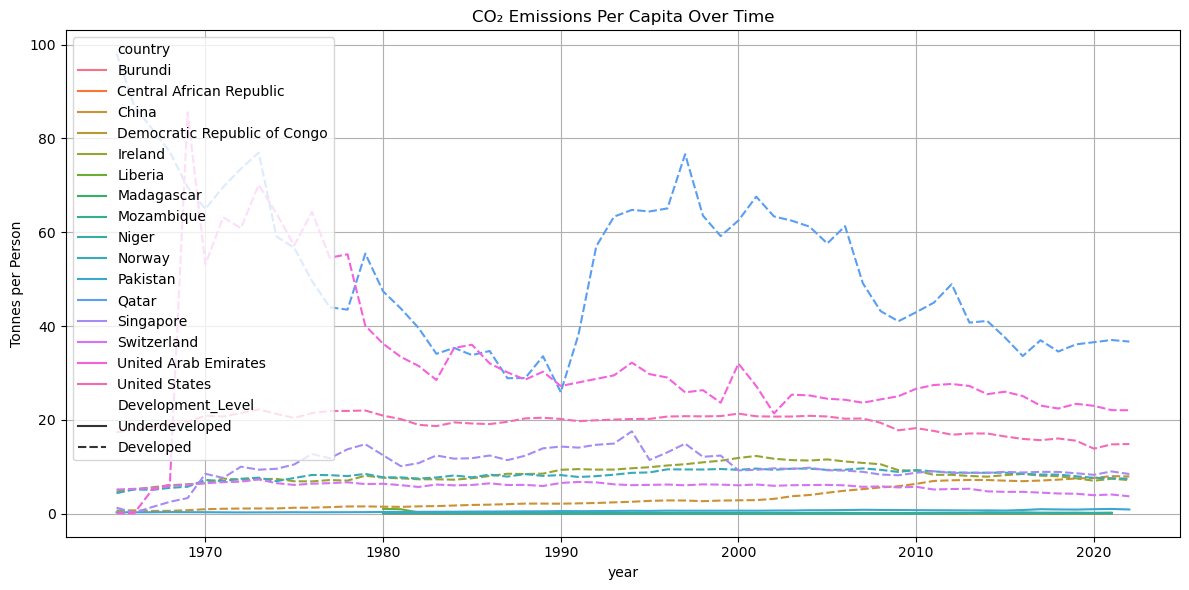

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=efficiency_data, x='year', y='co2_per_capita', hue='country', style='Development_Level')
plt.title("CO₂ Emissions Per Capita Over Time")
plt.ylabel("Tonnes per Person")
plt.grid(True)
plt.tight_layout()
plt.show()


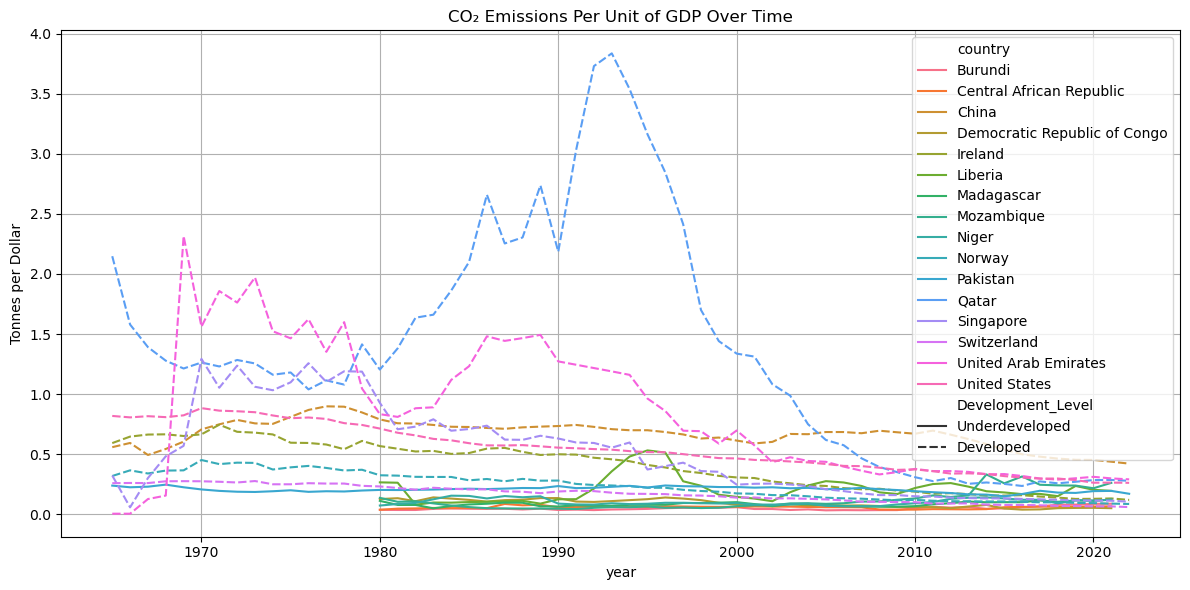

In [133]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=efficiency_data, x='year', y='co2_per_gdp', hue='country', style='Development_Level')
plt.title("CO₂ Emissions Per Unit of GDP Over Time")
plt.ylabel("Tonnes per Dollar")
plt.grid(True)
plt.tight_layout()
plt.show()


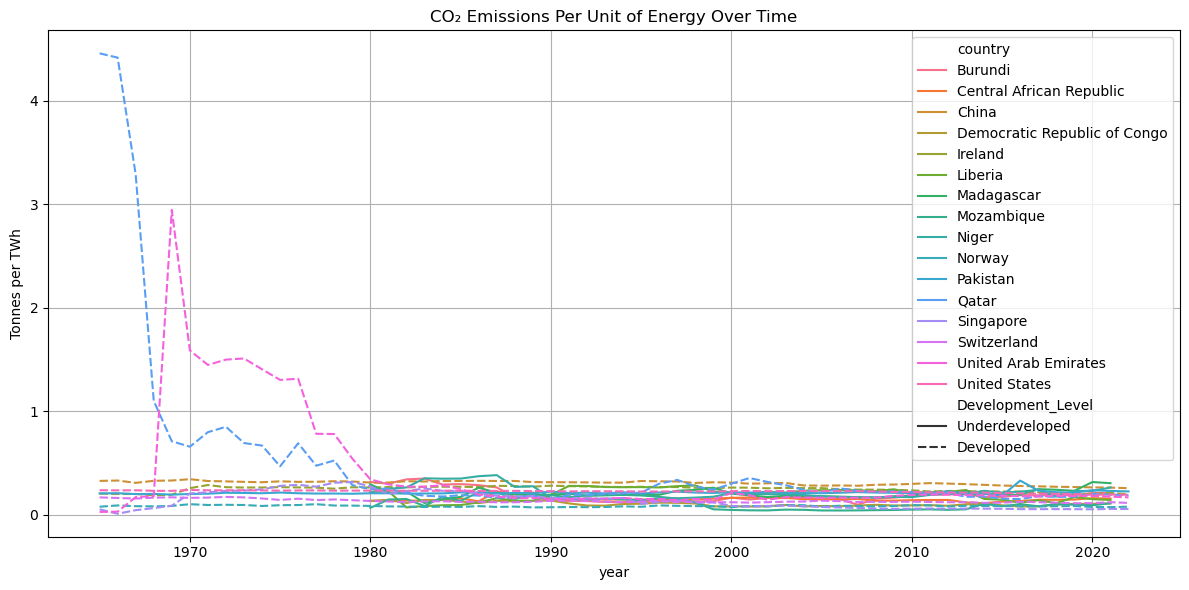

In [134]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=efficiency_data, x='year', y='co2_per_energy', hue='country', style='Development_Level')
plt.title("CO₂ Emissions Per Unit of Energy Over Time")
plt.ylabel("Tonnes per TWh")
plt.grid(True)
plt.tight_layout()
plt.show()


In [139]:
# Filter for countries with CO₂ data
co2_data = data[['country', 'year', 'co2']].dropna()

# Optional: exclude aggregates like "World", "Asia", etc.
exclude = ['World', 'Asia', 'Africa', 'Europe', 'North America', 'South America', 'International Transport']
co2_data = co2_data[~co2_data['country'].isin(exclude)]


In [141]:
# Get cumulative emissions per country
cumulative = co2_data.groupby('country')['co2'].sum().reset_index()
cumulative = cumulative.rename(columns={'co2': 'cumulative_co2'})

# Total global cumulative CO₂
total_global_co2 = cumulative['cumulative_co2'].sum()

# Add a column for % of total
cumulative['share'] = (cumulative['cumulative_co2'] / total_global_co2) * 100

# Sort descending by emissions
cumulative = cumulative.sort_values(by='cumulative_co2', ascending=False)


In [144]:
cumulative['cumulative_share'] = cumulative['share'].cumsum()
top_contributors = cumulative[cumulative['cumulative_share'] <= 80]

print(f"{len(top_contributors)} countries are responsible for ~80% of global CO₂ emissions.")


12 countries are responsible for ~80% of global CO₂ emissions.


In [146]:
significant_emitters = cumulative[cumulative['share'] >= 1]
print(f"{len(significant_emitters)} countries each emit ≥1% of cumulative global CO₂.")


17 countries each emit ≥1% of cumulative global CO₂.


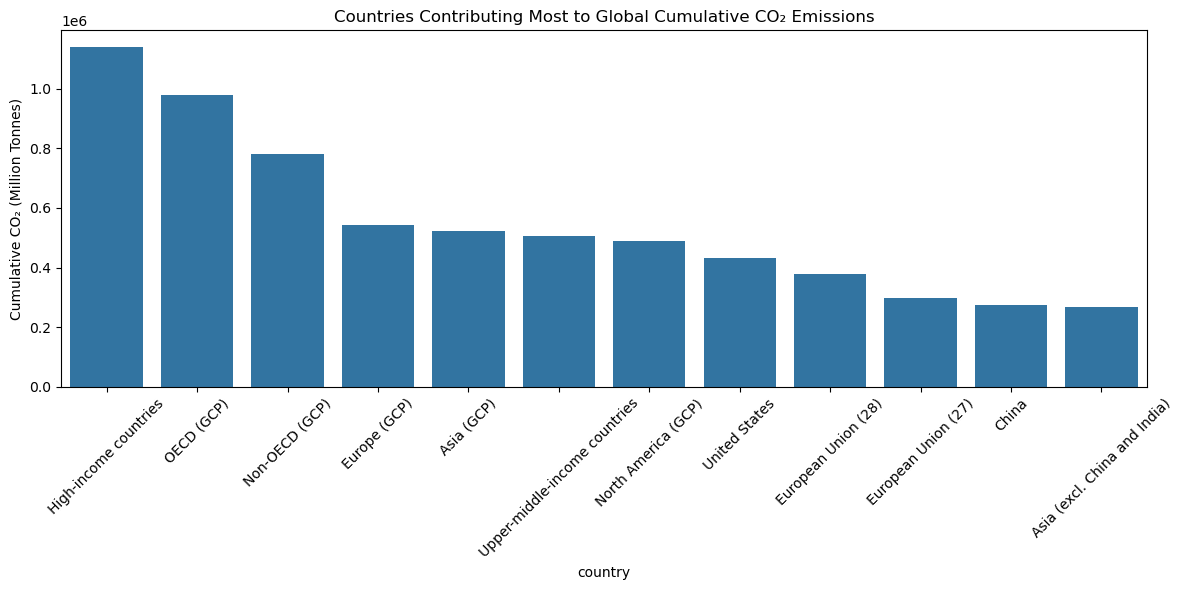

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_contributors, x='country', y='cumulative_co2')
plt.xticks(rotation=45)
plt.title("Countries Contributing Most to Global Cumulative CO₂ Emissions")
plt.ylabel("Cumulative CO₂ (Million Tonnes)")
plt.tight_layout()
plt.show()


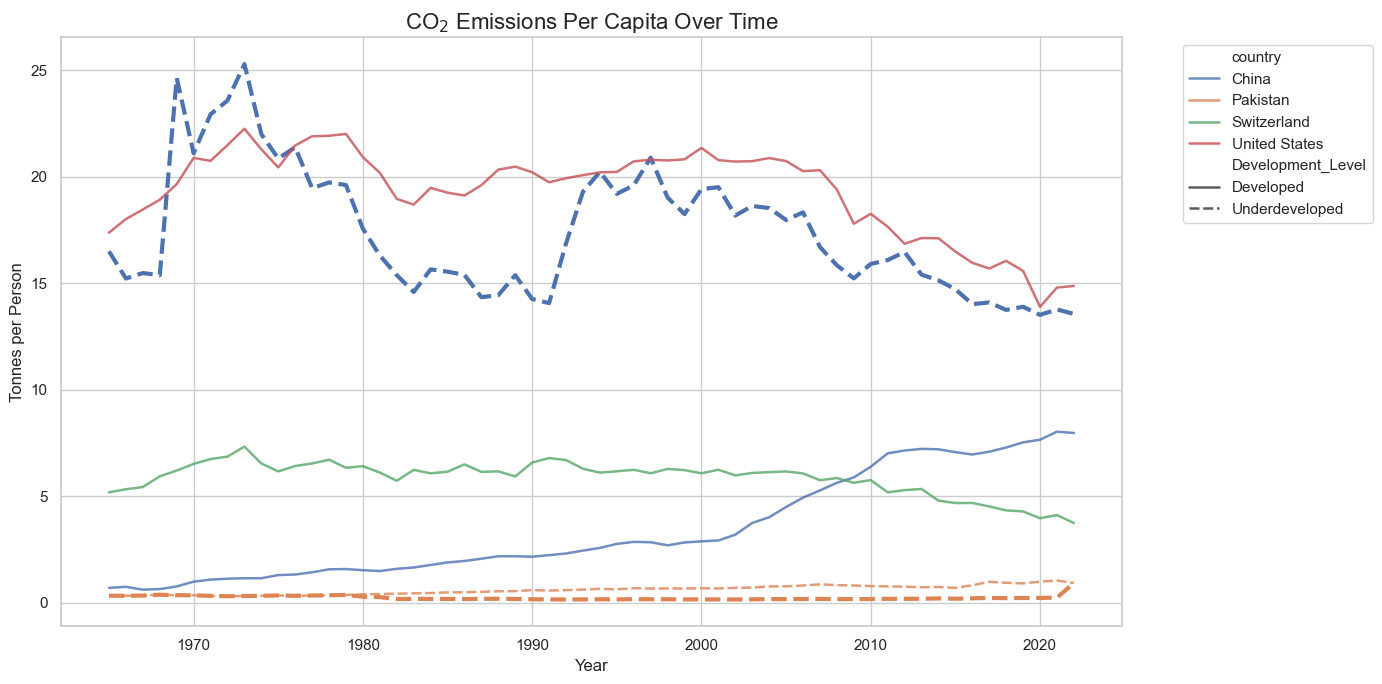

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'


# Define selected countries
selected_countries = developed + underdeveloped

# Filter required columns and drop missing values
efficiency_data = data[
    data['country'].isin(selected_countries)
][['country', 'year', 'co2_per_capita', 'co2_per_gdp', 'co2', 'primary_energy_consumption']].dropna()

# Calculate CO₂ per unit of energy
efficiency_data['co2_per_energy'] = efficiency_data['co2'] / efficiency_data['primary_energy_consumption']

# Assign development group
efficiency_data['Development_Level'] = efficiency_data['country'].apply(
    lambda x: 'Developed' if x in developed else 'Underdeveloped'
)

# Average CO₂ per capita by development level
avg_by_dev = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_capita'].mean().reset_index()

# Pick representative countries (e.g., top 2 from each group)
example_countries = ['United States', 'Switzerland', 'China', 'Pakistan']
highlighted = efficiency_data[efficiency_data['country'].isin(example_countries)]

# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot average lines for development groups
sns.lineplot(data=avg_by_dev, x='year', y='co2_per_capita', hue='Development_Level',
             linewidth=3, linestyle='--', legend=False)

# Plot selected individual countries with reduced clutter
sns.lineplot(data=highlighted, x='year', y='co2_per_capita', hue='country',
             style='Development_Level', linewidth=1.8, alpha=0.8)

# Annotations and formatting
plt.title("CO$_2$ Emissions Per Capita Over Time", fontsize=16)
plt.ylabel("Tonnes per Person")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [151]:
# Group averages
avg_dev = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_gdp'].mean().reset_index()

# Representative countries
example_countries = ['Qatar', 'Pakistan', 'United States', 'China']
highlighted = efficiency_data[efficiency_data['country'].isin(example_countries)]


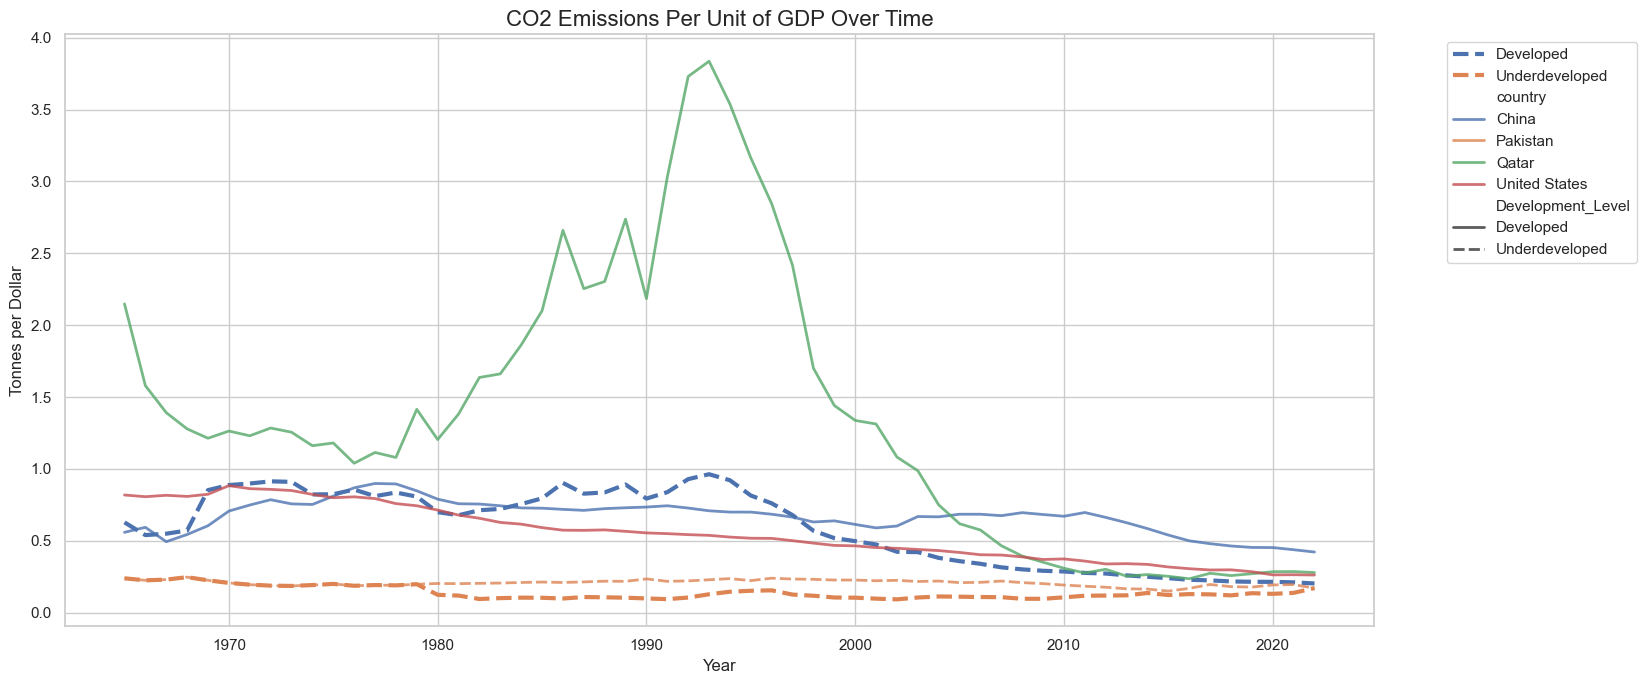

In [152]:
plt.figure(figsize=(14, 7))

# Average lines
sns.lineplot(data=avg_dev, x='year', y='co2_per_gdp', hue='Development_Level',
             linestyle='--', linewidth=3)

# Overlay selected countries
sns.lineplot(data=highlighted, x='year', y='co2_per_gdp', hue='country', 
             style='Development_Level', linewidth=2, alpha=0.8)

plt.title("CO2 Emissions Per Unit of GDP Over Time", fontsize=16)
plt.ylabel("Tonnes per Dollar")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


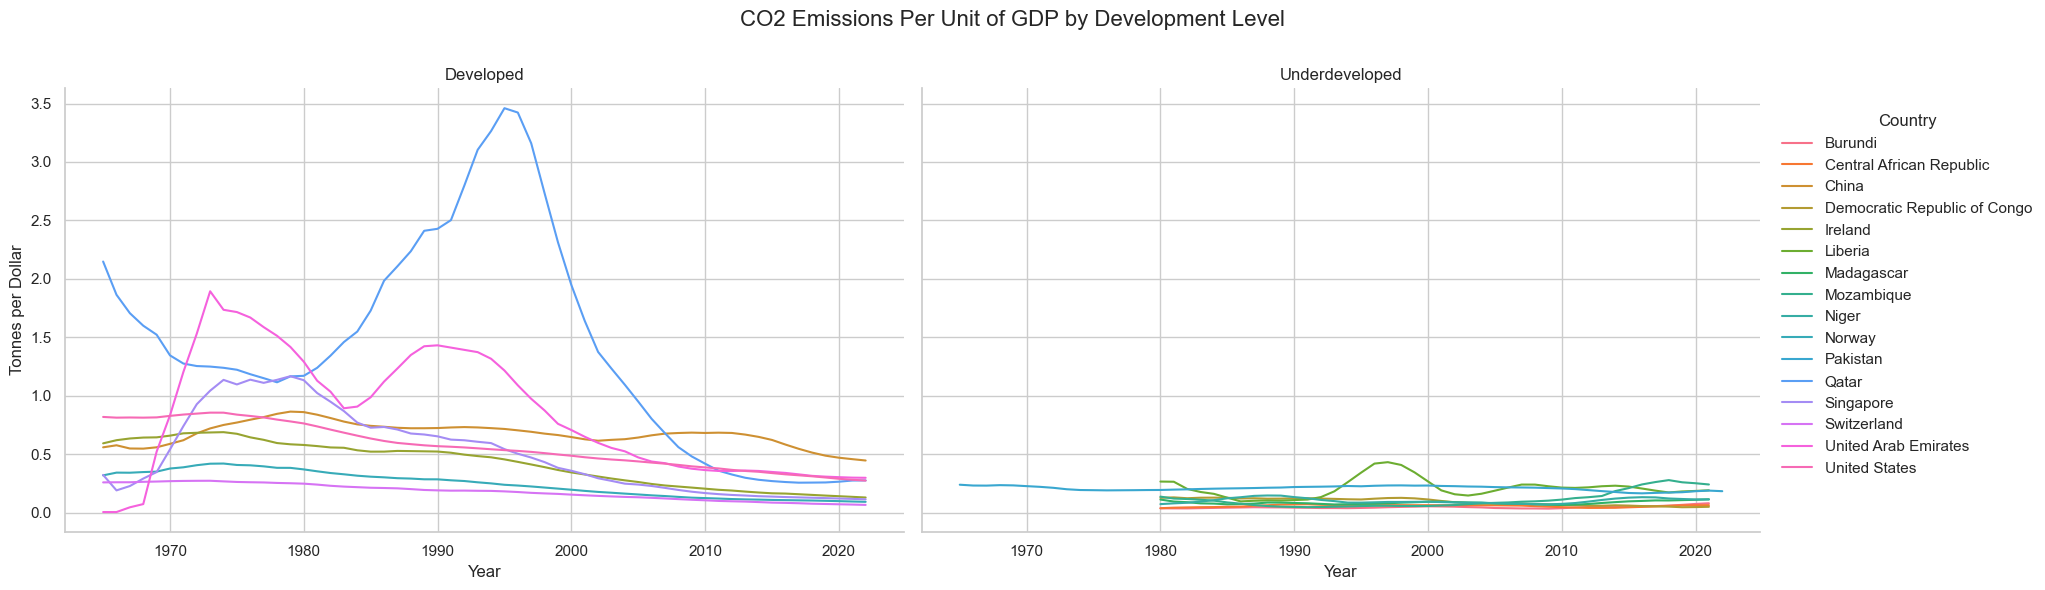

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# OPTIONAL: smooth out noisy lines (rolling average of 5 years)
efficiency_data['co2_gdp_smooth'] = efficiency_data.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# Set up seaborn plot style
sns.set(style="whitegrid")

# Create a FacetGrid with separate plots for each Development Level
g = sns.FacetGrid(data=efficiency_data, 
                  col="Development_Level", 
                  hue="country", 
                  height=6, 
                  aspect=1.5, 
                  sharey=True, 
                  col_order=['Developed', 'Underdeveloped'])  # optional order

# Map the lineplot to each subplot
g.map(sns.lineplot, "year", "co2_gdp_smooth")

# Customize labels and titles
g.set_axis_labels("Year", "Tonnes per Dollar")
g.set_titles("{col_name}")
g.add_legend(title="Country")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("CO2 Emissions Per Unit of GDP by Development Level", fontsize=16)

plt.show()


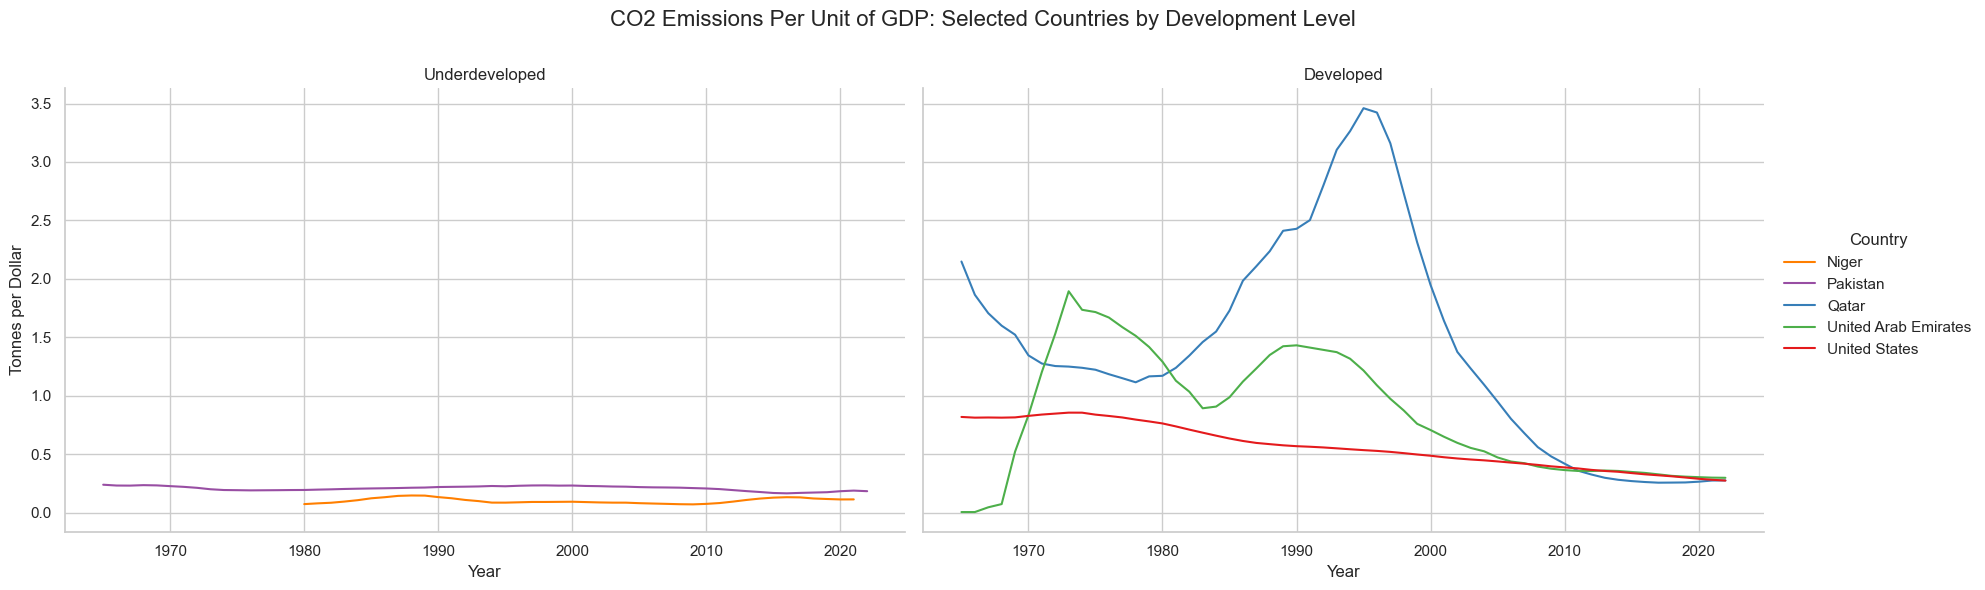

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define selected countries
selected_countries = ['United States', 'Qatar', 'United Arab Emirates',
                      'Pakistan', 'Niger', 'Bangladesh']

# Filter only selected countries
selected_data = efficiency_data[efficiency_data['country'].isin(selected_countries)].copy()

# Smooth the co2_per_gdp values (optional)
selected_data['co2_gdp_smooth'] = selected_data.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# Set seaborn style
sns.set(style="whitegrid")

# Define custom, highly distinguishable colors for 6 countries
custom_palette = {
    'United States': '#E41A1C',  # red
    'Qatar': '#377EB8',          # blue
    'United Arab Emirates': '#4DAF4A',  # green
    'Pakistan': '#984EA3',       # purple
    'Niger': '#FF7F00',          # orange
    'Bangladesh': '#A65628'      # brown
}

# Create facet grid split by development level
g = sns.FacetGrid(data=selected_data,
                  col="Development_Level",
                  hue="country",
                  palette=custom_palette,
                  height=6,
                  aspect=1.5,
                  sharey=True)

# Plot smoothed line
g.map(sns.lineplot, "year", "co2_gdp_smooth")

# Add labels and legend
g.set_axis_labels("Year", "Tonnes per Dollar")
g.set_titles("{col_name}")
g.add_legend(title="Country")
g.fig.suptitle("CO2 Emissions Per Unit of GDP: Selected Countries by Development Level", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()


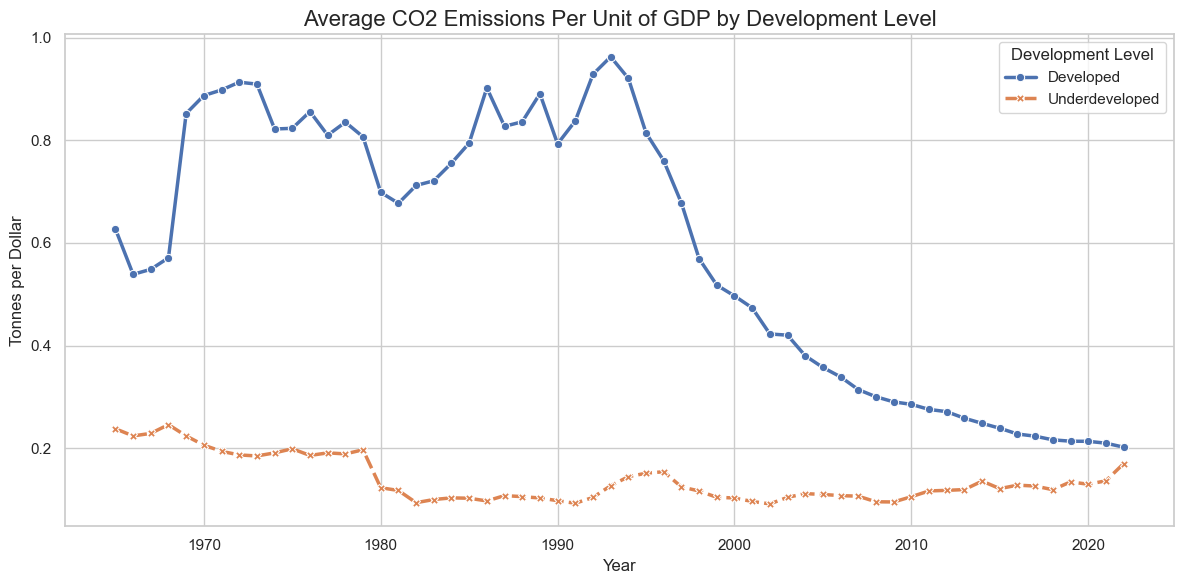

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and Development_Level, compute mean CO2 per GDP
avg_data = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_gdp'].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_data, x='year', y='co2_per_gdp', hue='Development_Level',
             style='Development_Level', markers=True, linewidth=2.5)

# Labels and titles
plt.title("Average CO2 Emissions Per Unit of GDP by Development Level", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Tonnes per Dollar")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Development Level")
plt.show()


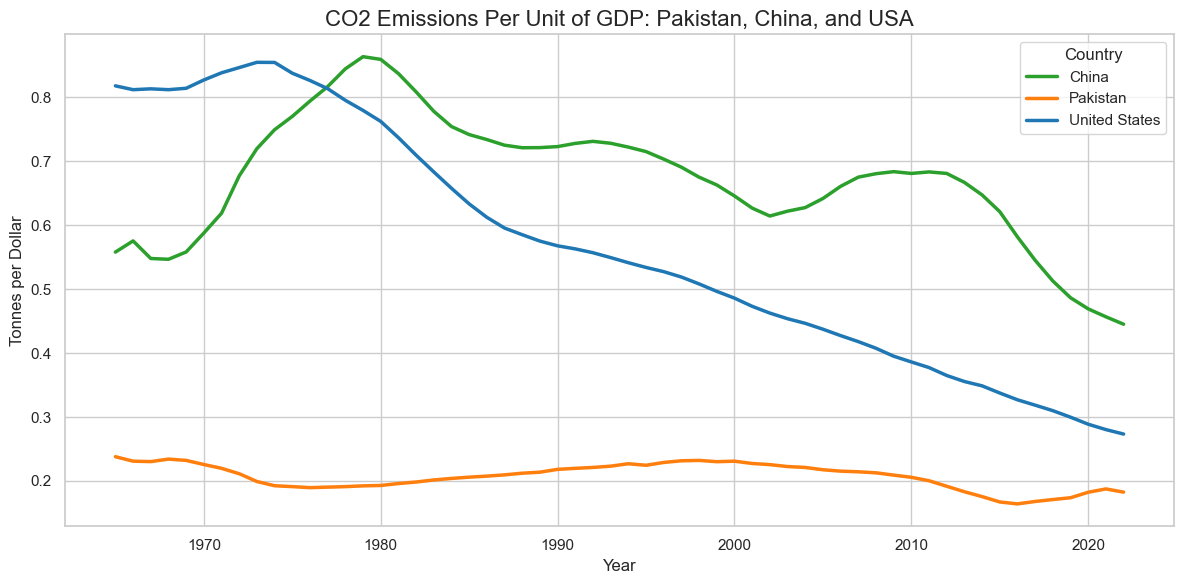

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the three selected countries
selected_countries = ['Pakistan', 'China', 'United States']
selected_data = efficiency_data[efficiency_data['country'].isin(selected_countries)].copy()

# Optional: smooth the data using a rolling average
selected_data['co2_gdp_smooth'] = selected_data.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# Set seaborn style
sns.set(style="whitegrid")

# Custom color palette
custom_palette = {
    'Pakistan': '#FF7F0E',       # orange
    'China': '#2CA02C',          # green
    'United States': '#1F77B4'   # blue
}

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=selected_data,
    x='year',
    y='co2_gdp_smooth',
    hue='country',
    palette=custom_palette,
    linewidth=2.5
)

# Chart formatting
plt.title("CO2 Emissions Per Unit of GDP: Pakistan, China, and USA", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Tonnes per Dollar")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Country")
plt.show()


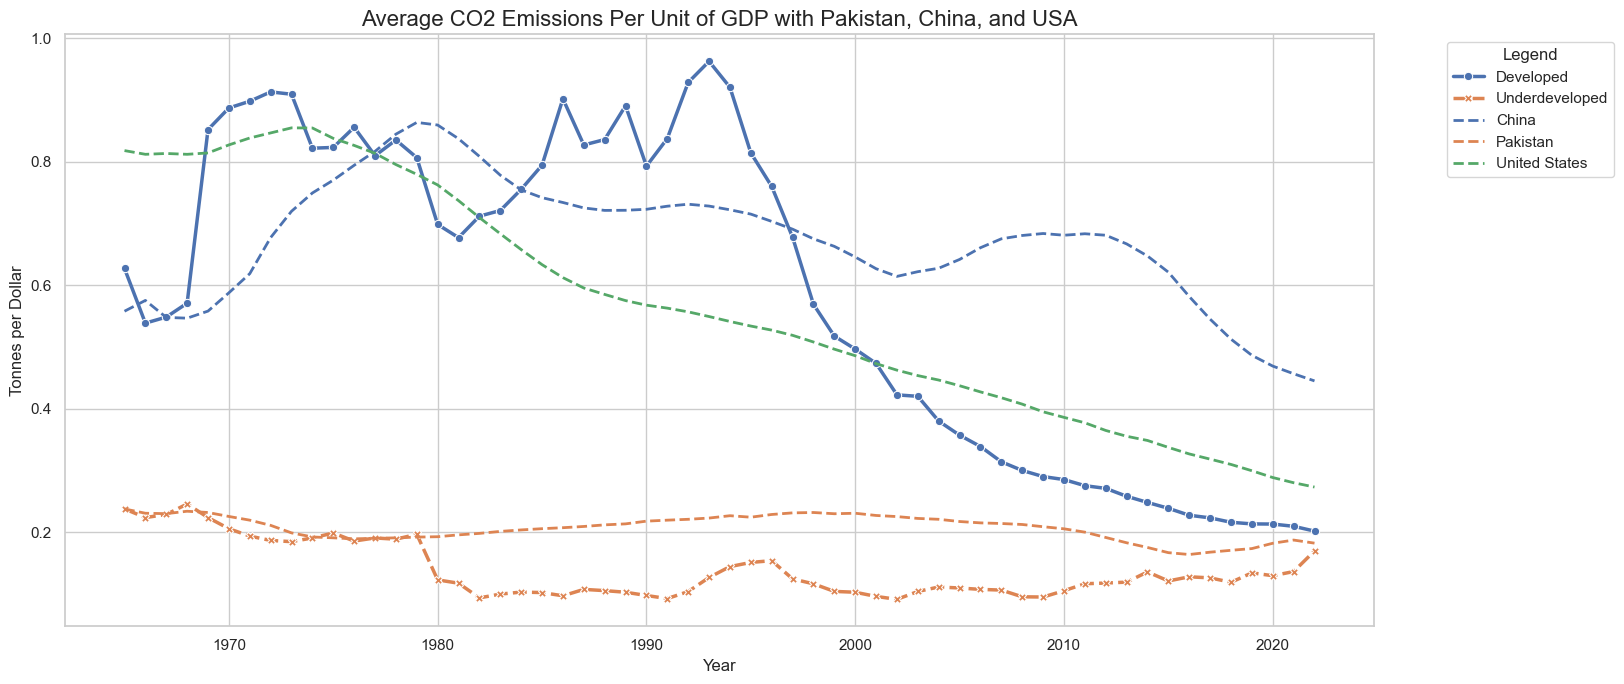

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group average data
avg_data = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_gdp'].mean().reset_index()

# 2. Select individual countries to highlight
highlight_countries = ['Pakistan', 'China', 'United States']
highlight_data = efficiency_data[efficiency_data['country'].isin(highlight_countries)].copy()

# Optional: Smooth country data
highlight_data['co2_gdp_smooth'] = highlight_data.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 3. Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# 4. Plot average lines for Developed and Underdeveloped
sns.lineplot(data=avg_data, x='year', y='co2_per_gdp', hue='Development_Level',
             style='Development_Level', linewidth=2.5, markers=True)

# 5. Plot individual country lines
sns.lineplot(data=highlight_data, x='year', y='co2_gdp_smooth', hue='country',
             linewidth=2, linestyle='--', legend=True)

# 6. Final touches
plt.title("Average CO2 Emissions Per Unit of GDP with Pakistan, China, and USA", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Tonnes per Dollar")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')


           


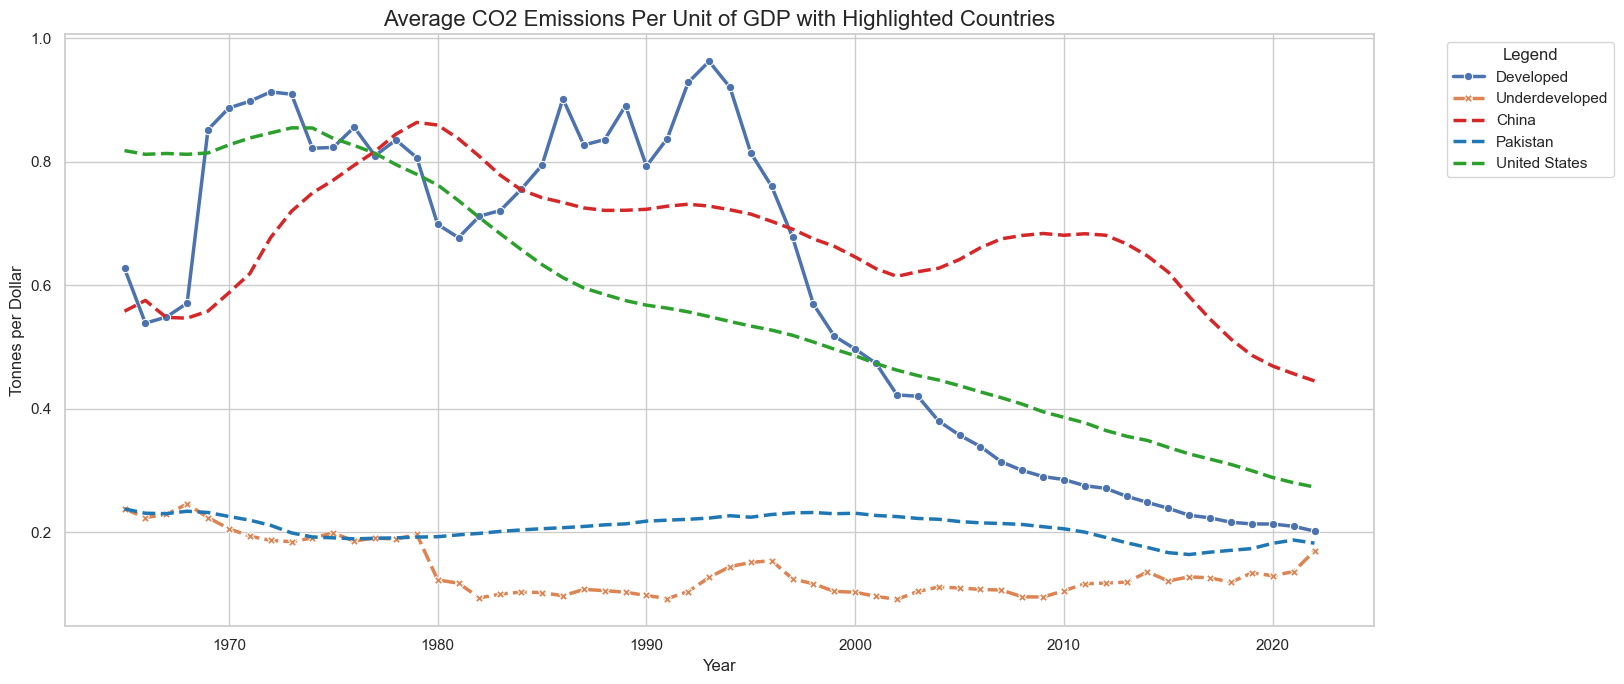

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group average data
avg_data = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_gdp'].mean().reset_index()

# 2. Select countries
highlight_countries = ['Pakistan', 'China', 'United States']
highlight_data = efficiency_data[efficiency_data['country'].isin(highlight_countries)].copy()

# 3. Smooth the values
highlight_data['co2_gdp_smooth'] = highlight_data.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 4. Custom color palette for clarity
custom_palette = {
    'Pakistan': '#1f77b4',       # Blue
    'China': '#d62728',          # Red
    'United States': '#2ca02c'   # Green
}

# 5. Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot average lines
sns.lineplot(data=avg_data, x='year', y='co2_per_gdp',
             hue='Development_Level', style='Development_Level',
             linewidth=2.5, markers=True)

# Plot individual countries with custom colors
sns.lineplot(data=highlight_data, x='year', y='co2_gdp_smooth',
             hue='country', palette=custom_palette,
             linewidth=2.5, linestyle='--')

# Final styling
plt.title("Average CO2 Emissions Per Unit of GDP with Highlighted Countries", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Tonnes per Dollar")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



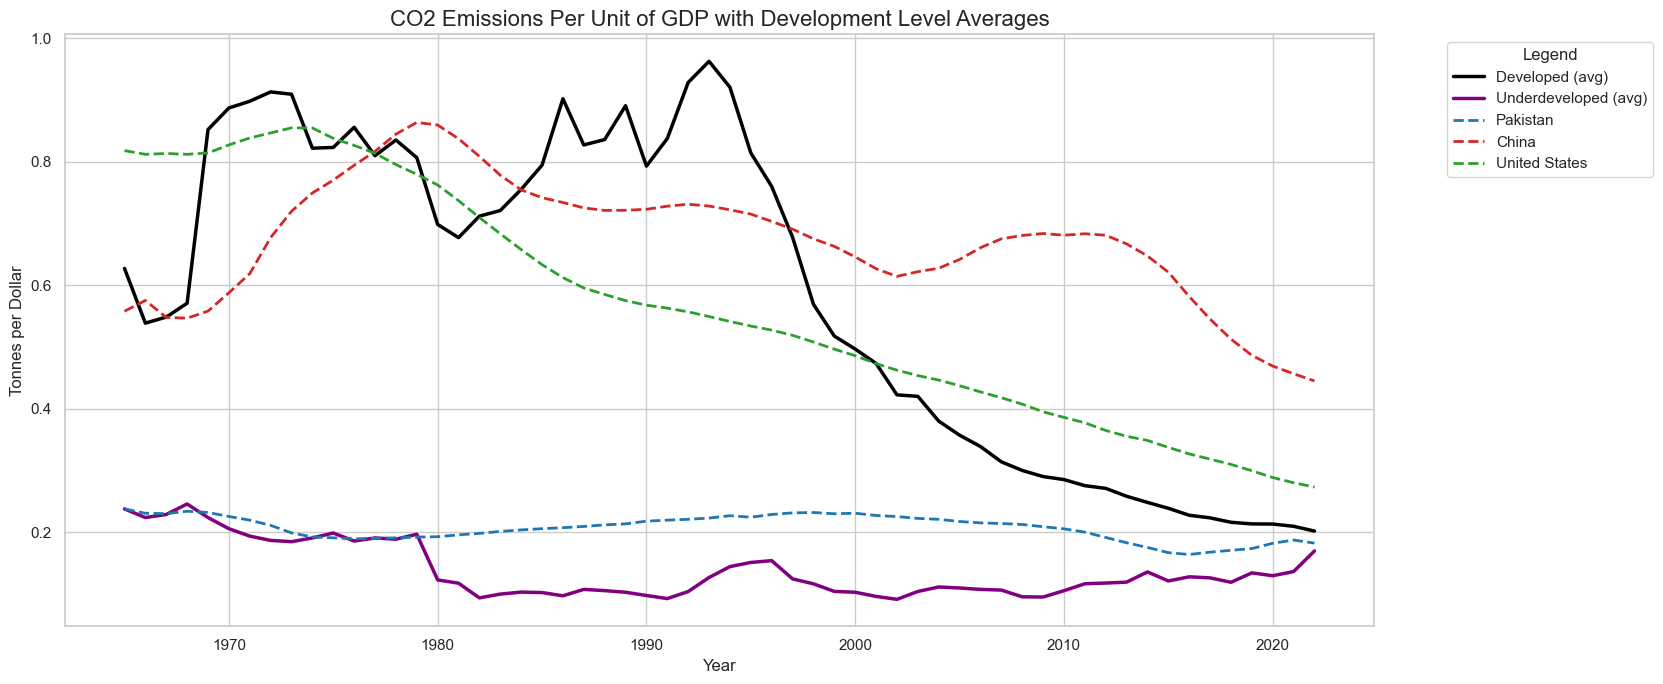

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group average data
avg_data = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_gdp'].mean().reset_index()

# 2. Separate Developed and Underdeveloped lines
avg_dev = avg_data[avg_data['Development_Level'] == 'Developed']
avg_under = avg_data[avg_data['Development_Level'] == 'Underdeveloped']

# 3. Select individual countries
highlight_countries = ['Pakistan', 'China', 'United States']
highlight_data = efficiency_data[efficiency_data['country'].isin(highlight_countries)].copy()

# 4. Smooth country lines
highlight_data['co2_gdp_smooth'] = highlight_data.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 5. Custom color palette for countries
custom_palette = {
    'Pakistan': '#1f77b4',       # Blue
    'China': '#d62728',          # Red
    'United States': '#2ca02c'   # Green
}

# 6. Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# 7. Plot average lines manually with black styling
plt.plot(avg_dev['year'], avg_dev['co2_per_gdp'], label='Developed (avg)', color='black', linestyle='solid', linewidth=2.5)
plt.plot(avg_under['year'], avg_under['co2_per_gdp'], label='Underdeveloped (avg)', color='purple', linestyle='solid', linewidth=2.5)

# 8. Plot individual countries
for country in highlight_countries:
    country_data = highlight_data[highlight_data['country'] == country]
    plt.plot(country_data['year'], country_data['co2_gdp_smooth'],
             label=country, color=custom_palette[country], linestyle='--', linewidth=2)

# 9. Final layout
plt.title("CO2 Emissions Per Unit of GDP with Development Level Averages", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Tonnes per Dollar")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


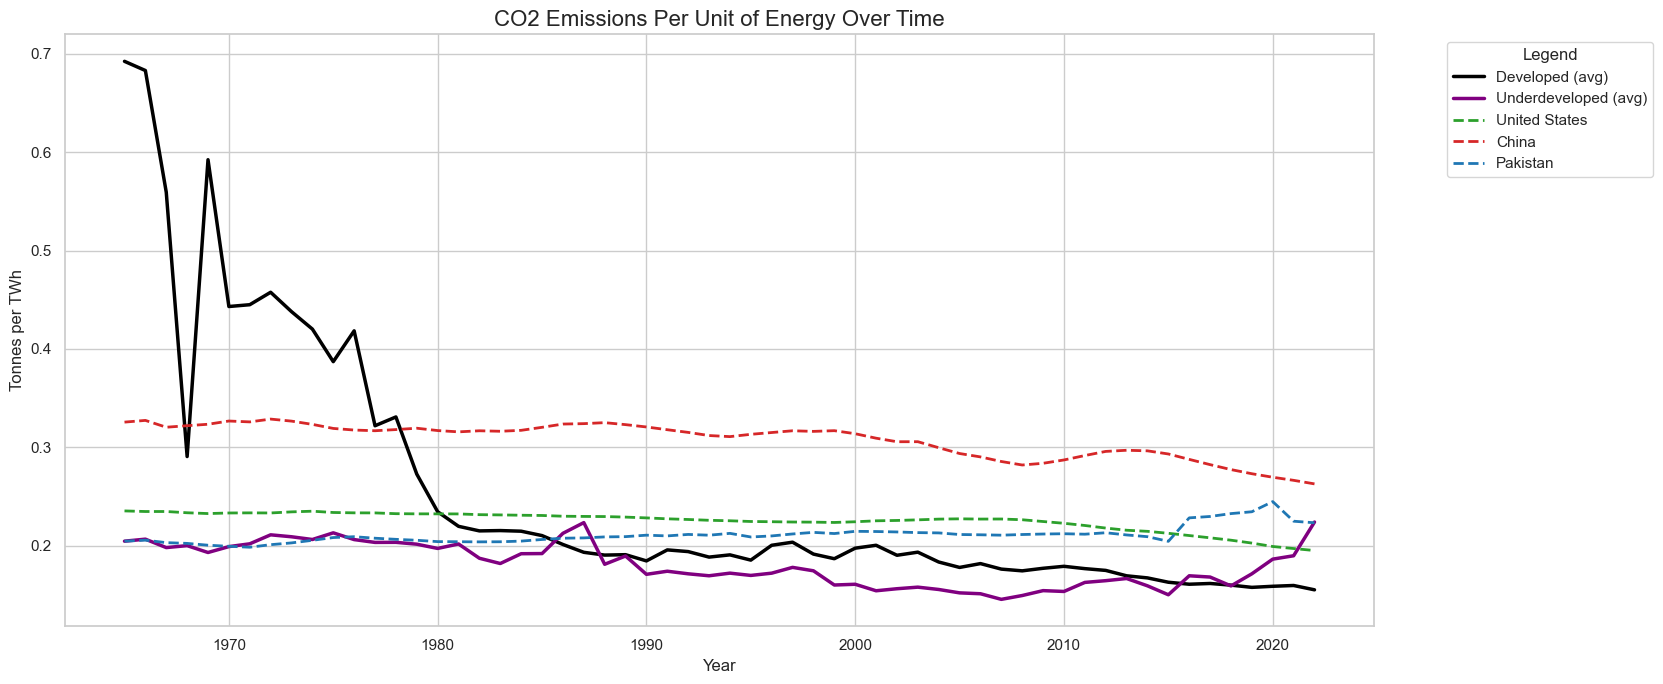

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute group averages
avg_energy = efficiency_data.groupby(['year', 'Development_Level'])['co2_per_energy'].mean().reset_index()
avg_dev = avg_energy[avg_energy['Development_Level'] == 'Developed']
avg_under = avg_energy[avg_energy['Development_Level'] == 'Underdeveloped']

# 2. Select key countries
highlight_countries = ['United States', 'China', 'Pakistan']
highlight_data = efficiency_data[efficiency_data['country'].isin(highlight_countries)].copy()

# 3. Smooth country data
highlight_data['co2_energy_smooth'] = highlight_data.groupby('country')['co2_per_energy'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 4. Custom colors for countries
custom_palette = {
    'Pakistan': '#1f77b4',       # Blue
    'China': '#d62728',          # Red
    'United States': '#2ca02c'   # Green
}

# 5. Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot group averages
plt.plot(avg_dev['year'], avg_dev['co2_per_energy'], label='Developed (avg)',
         color='black', linestyle='solid', linewidth=2.5)
plt.plot(avg_under['year'], avg_under['co2_per_energy'], label='Underdeveloped (avg)',
         color='purple', linestyle='solid', linewidth=2.5)

# Plot selected countries
for country in highlight_countries:
    country_data = highlight_data[highlight_data['country'] == country]
    plt.plot(country_data['year'], country_data['co2_energy_smooth'],
             label=country, color=custom_palette[country], linestyle='--', linewidth=2)

# Final touches
plt.title("CO2 Emissions Per Unit of Energy Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Tonnes per TWh")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
